# <p style="text-align:center;">**AIRBNB BANGKOK ANALYSIS**</p>



<p align="center"><img src = https://akcdn.detik.net.id/community/media/visual/2021/08/26/logo-airbnb_169.jpeg?w=700&q=90>

---

# Latar Belakang

Airbnb adalah sebuah perusahaan asal Amerika yang telah tersebar diseluruh dunia yang mengoperasikan pasar online untuk homestay dan pengalaman jangka pendek dan jangka panjang.
Saat ini mereka sedang melakukan evaluasi terkait bagaimana prospek hotel di Bangkok dan sasaran pasar yang layak untuk ditingkatkan.

## Pernyataan Masalah

Berdasarkan report yang dikeluarkan oleh *Travel Weekly ASIA* dan *Bangkok Post*, Bangkok saat ini sedang menghadapi 2 masalah utama khususnya dalam dunia perhotelan yaitu [***Oversupply***](https://www.travelweekly-asia.com/Travel-News/Hotel-News/Tempered-expectations-Thailand-may-face-hotel-oversupply) dan [***Unable to Improve Room Rates***](https://www.bangkokpost.com/business/general/2666158/hotels-unable-to-improve-room-rates) , tapi disaat bersamaan berdasarkan report yang dikeluarkan oleh [*JLL*](https://realestateasia.com/commercial-hotel/news/bangkok-add-over-3000-new-keys-its-hotel-supply-year-end) Bangkok sedang berada dalam fase recovery pasca pandemi.

Berkaca dari report yang dikeluarkan oleh institusi-institusi tersebut Airbnb ingin mengetahui bagaimana sebenarnya kondisi hotel di Bangkok, apakah sudah sampai pada tahap Oversupply dan kategori hotel seprti apa yang masih dapat terserap dengan cukup baik oleh pasar. Informasi ini akan memudahkan Airbnb dalam menentukan strategi pemasaran, pembukaan hotel baru atau strategi untuk bisa melakukan improve room rates.



***Key Question :***
1. Seperti apakah tipe wisatawan yang mengunjungi Bangkok berdasarkan budget penginapan dan tujuan perjalanan?
2. Apakah kondisi penginapan di Bangkok saat ini sudah mencapai fase Oversupply?
3. Apakah memungkinkan untuk menaikan room rates?

***Assumption and Limiting Conditions :***
1. Analyst meyakini bahwa data yang ada di dataset ini adalah valid sehingga analyst tidak melakukan verifikasi ulang terhadap data.
2. Asumsi untuk setiap pengunjung hanya dapat memberikan 1 kali review, sehingga setiap review akan dianggap sebagai 1 orang.
3. Analisa popularitas dari total review hanya menggambarkan seberapa populer tanpa mempertimbangkan apakah itu berupa sentimen positif atau negatif
4. Untuk setiap angka yang kurang dari 365 pada kolom `availability_365` akan dianggap telah dibooking oleh tamu, sehingga kemungkinan bahwa itu bahwa penginapan tersebut dipakai pribadi oleh owner ditiadakan pada analisa ini.
5. Asumsi mata uang yang digunakan adalah **Baht Thailand (฿)**

# Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa dataset Airbnb yang berisi informasi listing hotel yang ada di Bangkok. 

In [154]:
pip install missingno folium geopandas pyshp

Note: you may need to restart the kernel to use updated packages.


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal
import seaborn as sns
import missingno as msno

import folium
from googletrans import Translator
from folium import plugins
import geopandas as gpd
import shapefile
from shapely.geometry import Polygon
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

Berikut adalah deskripsi utnuk setiap kolom dalam tabel pada dataset Airbnb:

| Kolom                                 | Deskripsi                                                                                                                                                                                                                                                                                                          |
|---------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                                    | Airbnb's unique identifier for the listing.                                                                                                                                                                                                                                                                       |
| name                                  | Name of the listing.                                                                                                                                                                                                                                                                                               |
| host_id                               | Airbnb's unique identifier for the host/user.                                                                                                                                                                                                                                                                      |
| host_name                             | Name of the host. Usually, just the first name(s).                                                                                                                                                                                                                                                                 |
| neighborhood                          | The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.                                                                                                                                                                               |
| latitude                              | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                                                                                                                                      |
| longitude                             | Uses the World Geodetic System (WGS84) projection for latitude and longitude.                                                                                                                                                                                                                                      |
| room_type                             | Type of room available: Entire home/apt, Private room, Shared room, or Hotel.                                                                                                                                                                                                                                      |
| price                                 | Daily price in local currency. Note, the $ sign may be used despite the locale.                                                                                                                                                                                                                                   |
| minimum_nights                       | The minimum number of night stays for the listing (calendar rules may differ).                                                                                                                                                                                                                                    |
| number_of_reviews                    | The number of reviews the listing has.                                                                                                                                                                                                                                                                             |
| last_review                          | The date of the last/newest review.                                                                                                                                                                                                                                                                               |
| calculated_host_listings_count       | The number of listings the host has in the current scrape in the city/region geography.                                                                                                                                                                                                                            |
| availability_365                     | The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host.                                                                                                                                     |
| number_of_reviews_ltm                | The number of reviews the listing has (in the last 12 months).                                                                                                                                                                                                                                                    |

Berikut 5 baris teratas dan terbawah dari dataset Airbnb

In [156]:
air_bnb =  pd.read_csv('Airbnb Listings Bangkok.csv')
display(air_bnb.head(),air_bnb.tail())

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


Setelah melihat dataset tersebut, kita ingin mengetahui estimasi kapan dataset ini dibuat dengan cara melihat tanggal termuda dari kolom `last_review`

In [157]:
air_bnb['last_review'] = pd.to_datetime(air_bnb['last_review'], errors='coerce')

latest_review_date = air_bnb['last_review'].max()
print("Tanggal termuda dari kolom 'Last Review':", latest_review_date)

Tanggal termuda dari kolom 'Last Review': 2022-12-28 00:00:00


In [158]:
air_bnb['last_review'] = pd.to_datetime(air_bnb['last_review'], errors='coerce')

latest_review_date = air_bnb['last_review'].min()
print("Tanggal termuda dari kolom 'Last Review':", latest_review_date)

Tanggal termuda dari kolom 'Last Review': 2012-12-15 00:00:00


Berdasarkan hasil pengecekan tersebut dapat kita asumsikan bahwa dataset Airbnb adalah valid per tanggal **28 Desember 2022**

## Data Understanding dan  Data Cleaning

Disini kita perlu melakukan penanganan/handling terhadap missing value dan data anomali, serta memahami apa isight yang dapat diambil dari data

Kita melihat jumlah dan jenis data dari tiap kolom :

In [159]:
print(f'Jumlah baris dan kolom di dataset Airbnb adalah {air_bnb.shape}')
air_bnb.info()

Jumlah baris dan kolom di dataset Airbnb adalah (15854, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15854 non-null  int64         
 1   id                              15854 non-null  int64         
 2   name                            15846 non-null  object        
 3   host_id                         15854 non-null  int64         
 4   host_name                       15853 non-null  object        
 5   neighbourhood                   15854 non-null  object        
 6   latitude                        15854 non-null  float64       
 7   longitude                       15854 non-null  float64       
 8   room_type                       15854 non-null  object        
 9   price                           15854 non-null  int64         
 10  minimum_ni

Kita dapat melihat dari informasi awal terkait dataset Airbnb :
- Dataset terdiri dari 15.854 Baris dan 17 Kolom
- Terdapat 3 kolom dengan tipe float64, 9 kolom dengan tipe int64 dan 5 kolom yang bertipe object
- 4 kolom yang memiliki missing value yaitu :
    - name
    - host_name
    - last_review
    - reviews_per_month

Kita akan melihat statistika deskriptif dari dataset Airbnb :

In [160]:
display(air_bnb.describe(),air_bnb.describe(include=object))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,2021-08-30 08:37:49.316375296,0.813145,13.889618,244.378643,3.481519
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,NaN,1.090196,30.269848,125.843224,8.916937


,name,host_name,neighbourhood,room_type
count,15846,15853,15854,15854
unique,14794,5312,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2153,8912


Dari descriptive statistic diatas kita dapat mengetahui mean, standar deviasi, Q1, Q2, Q3, nilai minimum dan maximum, modus dan jumlah nilai unik dari tiap kolom.

Kita juga bisa melihat nilai unik untuk tiap kolom seperti dibawah ini :

In [161]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in air_bnb.columns :
    listItem.append( [col, air_bnb[col].nunique(), air_bnb[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel roo

### **Handling Missing Value**

Setelah kita mengetahui deskriptif statistik dan jenis data yang ada dalam tiap kolom pada dataset, sekarang kita akan melihat missing value yang ada pada dataset

In [162]:
air_bnb.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [163]:
air_bnb.isna().sum()/air_bnb.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

<Axes: >

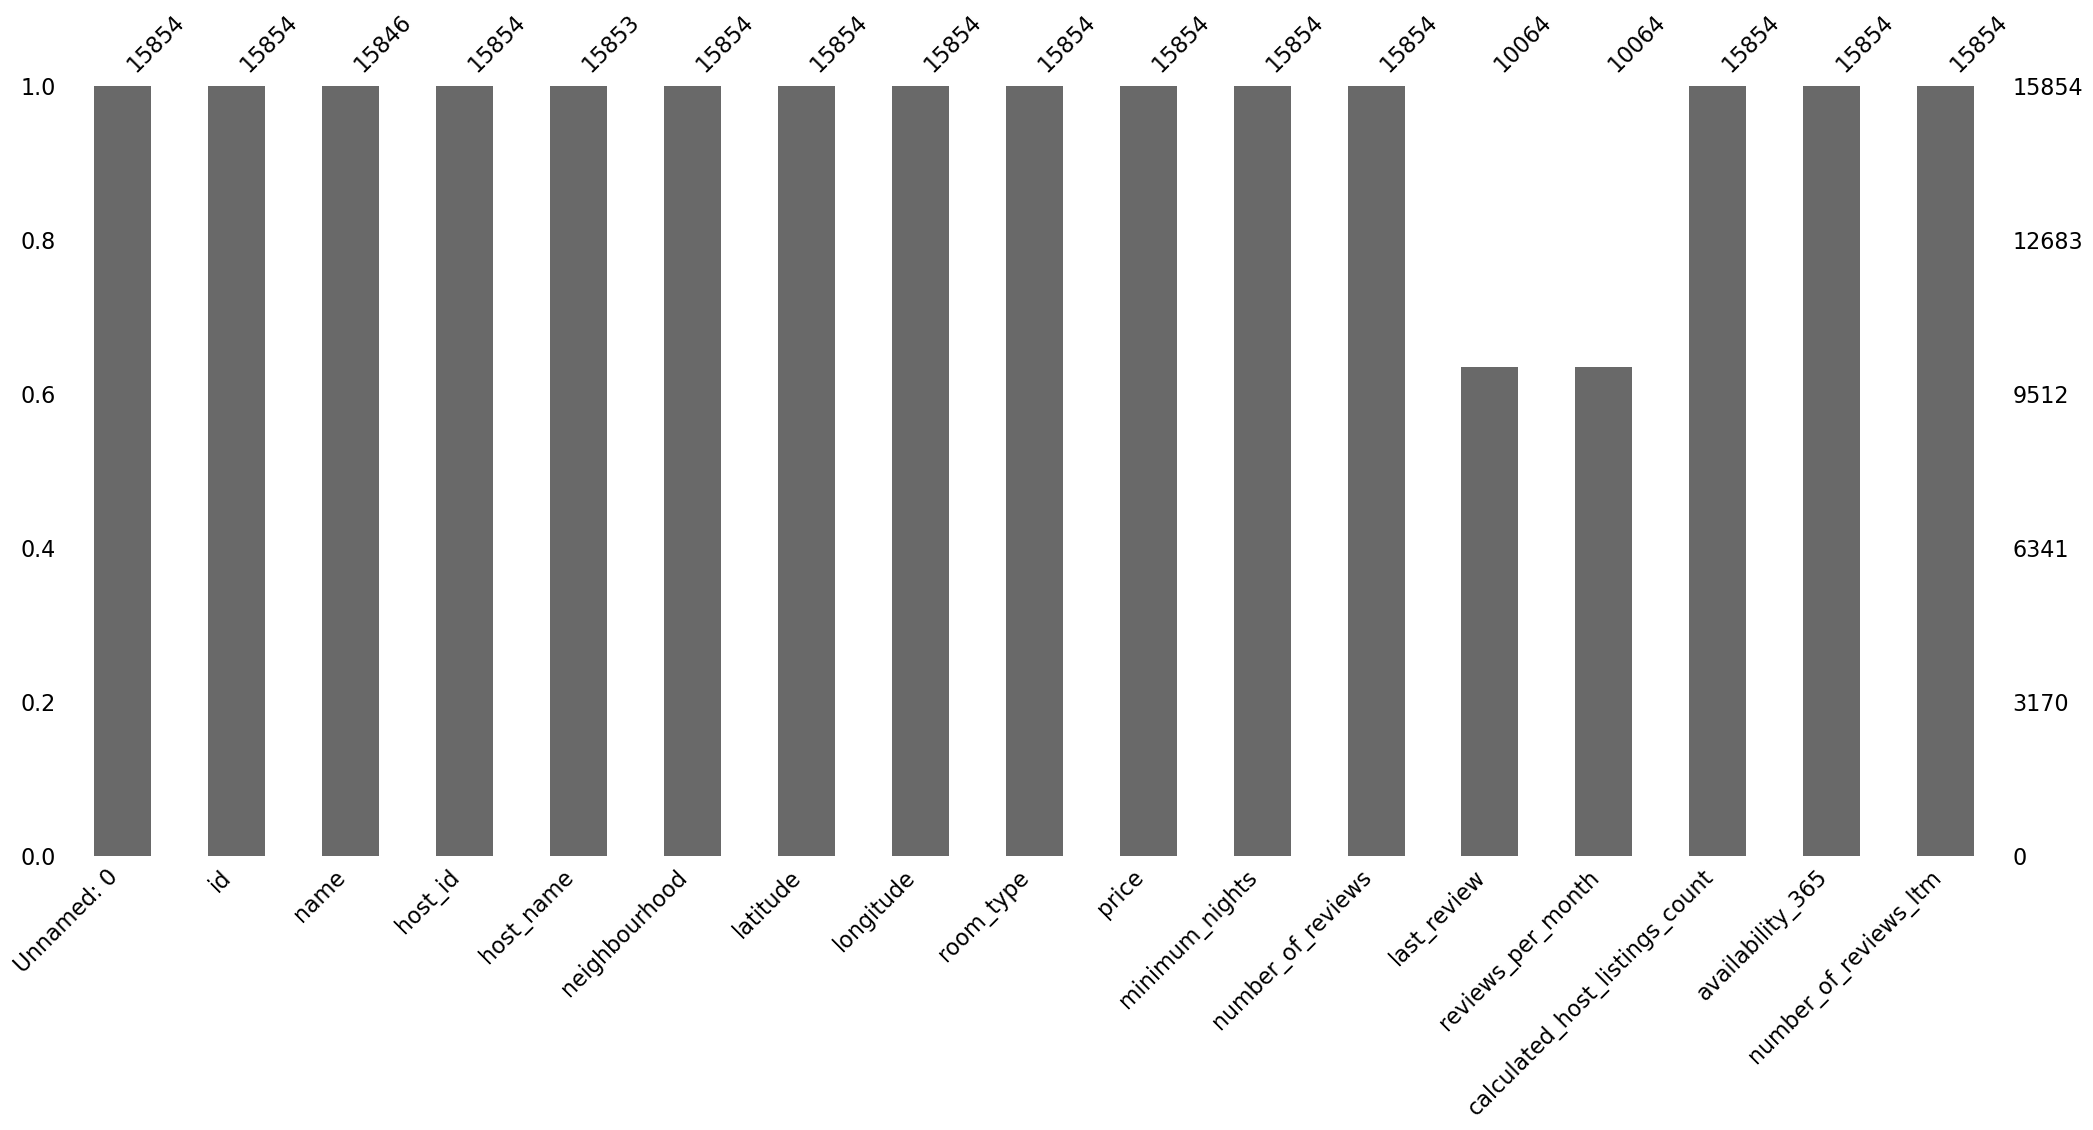

In [164]:
msno.bar(air_bnb)

Dari hasil pengecekan diatas kita dapat mengetahui bahwa terdapat 4 kolom yang mengandung missing value, yaitu :

| Column Name| Persentase Missing| Number of Missing Data
|---------------------------------------|------------------------|------------------------|
| name | 0,05%|  8
| host_name| 0,006%| 1
| last_review| 36,52%| 5.790
| reviews_per_month| 36,52%|5.790

Disini kita bisa melihat bahwa persentase missing dan row missing pada last_review dan reviews_per_month memiliki jumlah yang sama, sehingga ada kecurigaan bahwa kedua kolom ini saling berhubungan, kita akan mencoba melihat persebaran missing value dari 2 kolom tersebut.


<Axes: >

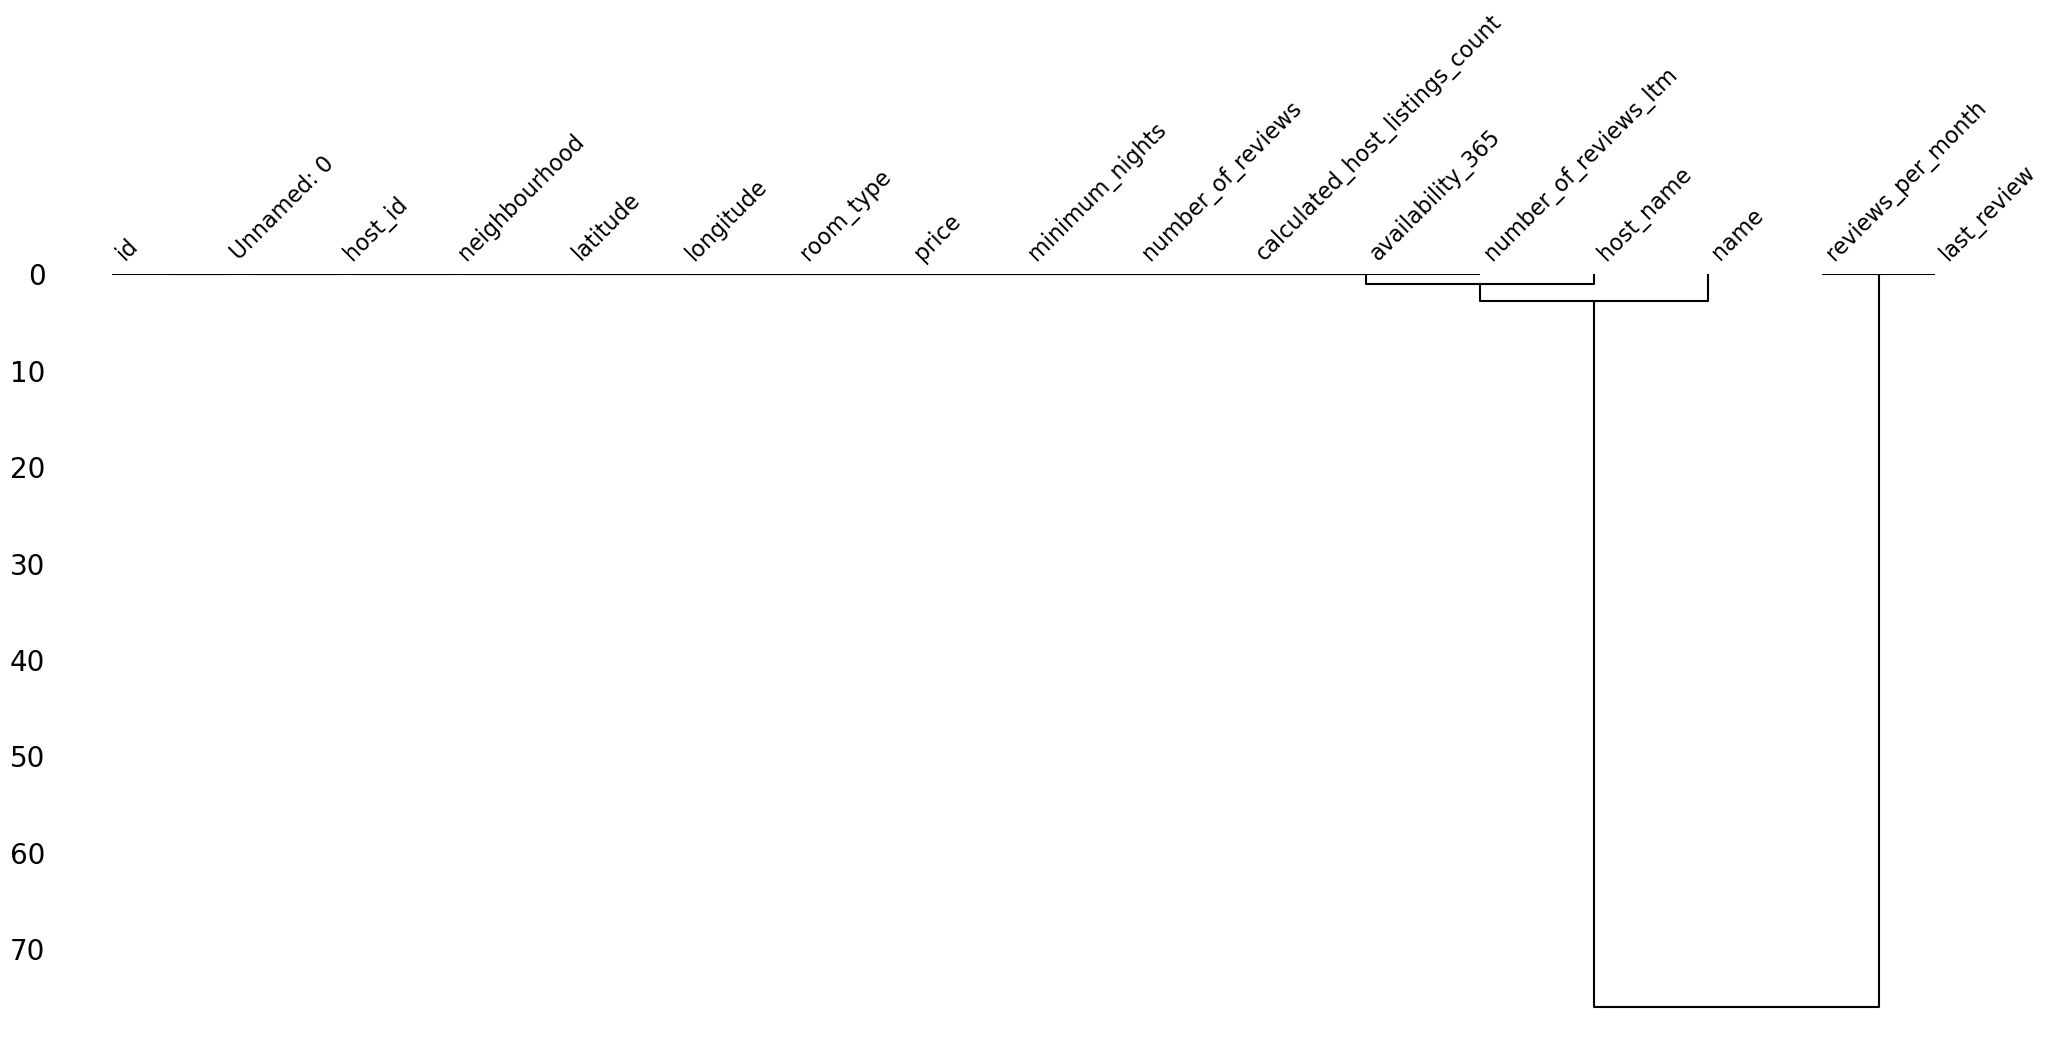

In [165]:
msno.dendrogram(air_bnb)

<Axes: >

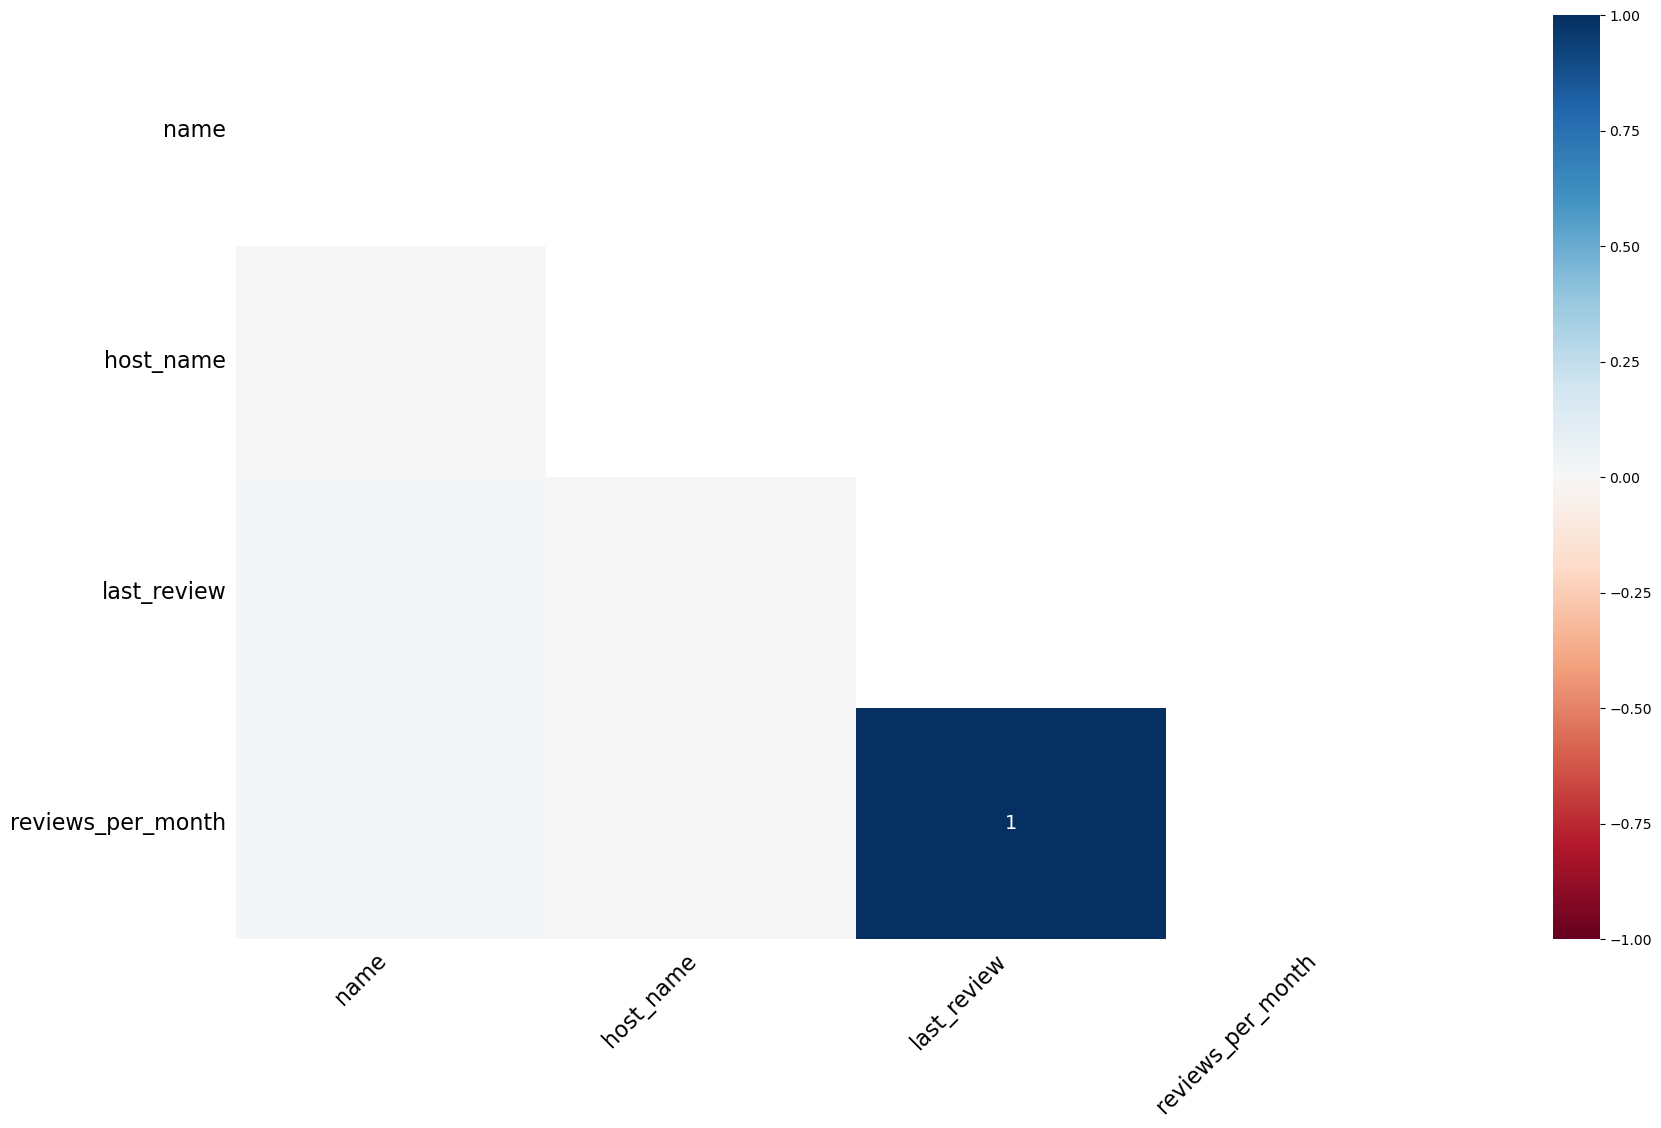

In [166]:
msno.heatmap(air_bnb)

Dari sini kita dapat mengetahui bahwa benar missing value pada `reviews_per_month` dan `last_review` memiliki hubungan yang sangat erat, ditunjukan dengan angka 1 pada Heatmap.

Setelah mengetahui bahwa `reviews_per_month` dan `last_review` memiliki hubungan yang sangat kuat, kita akan mencari tahu tentang tipe missing value dari 2 kolom tersebut.

<Axes: >

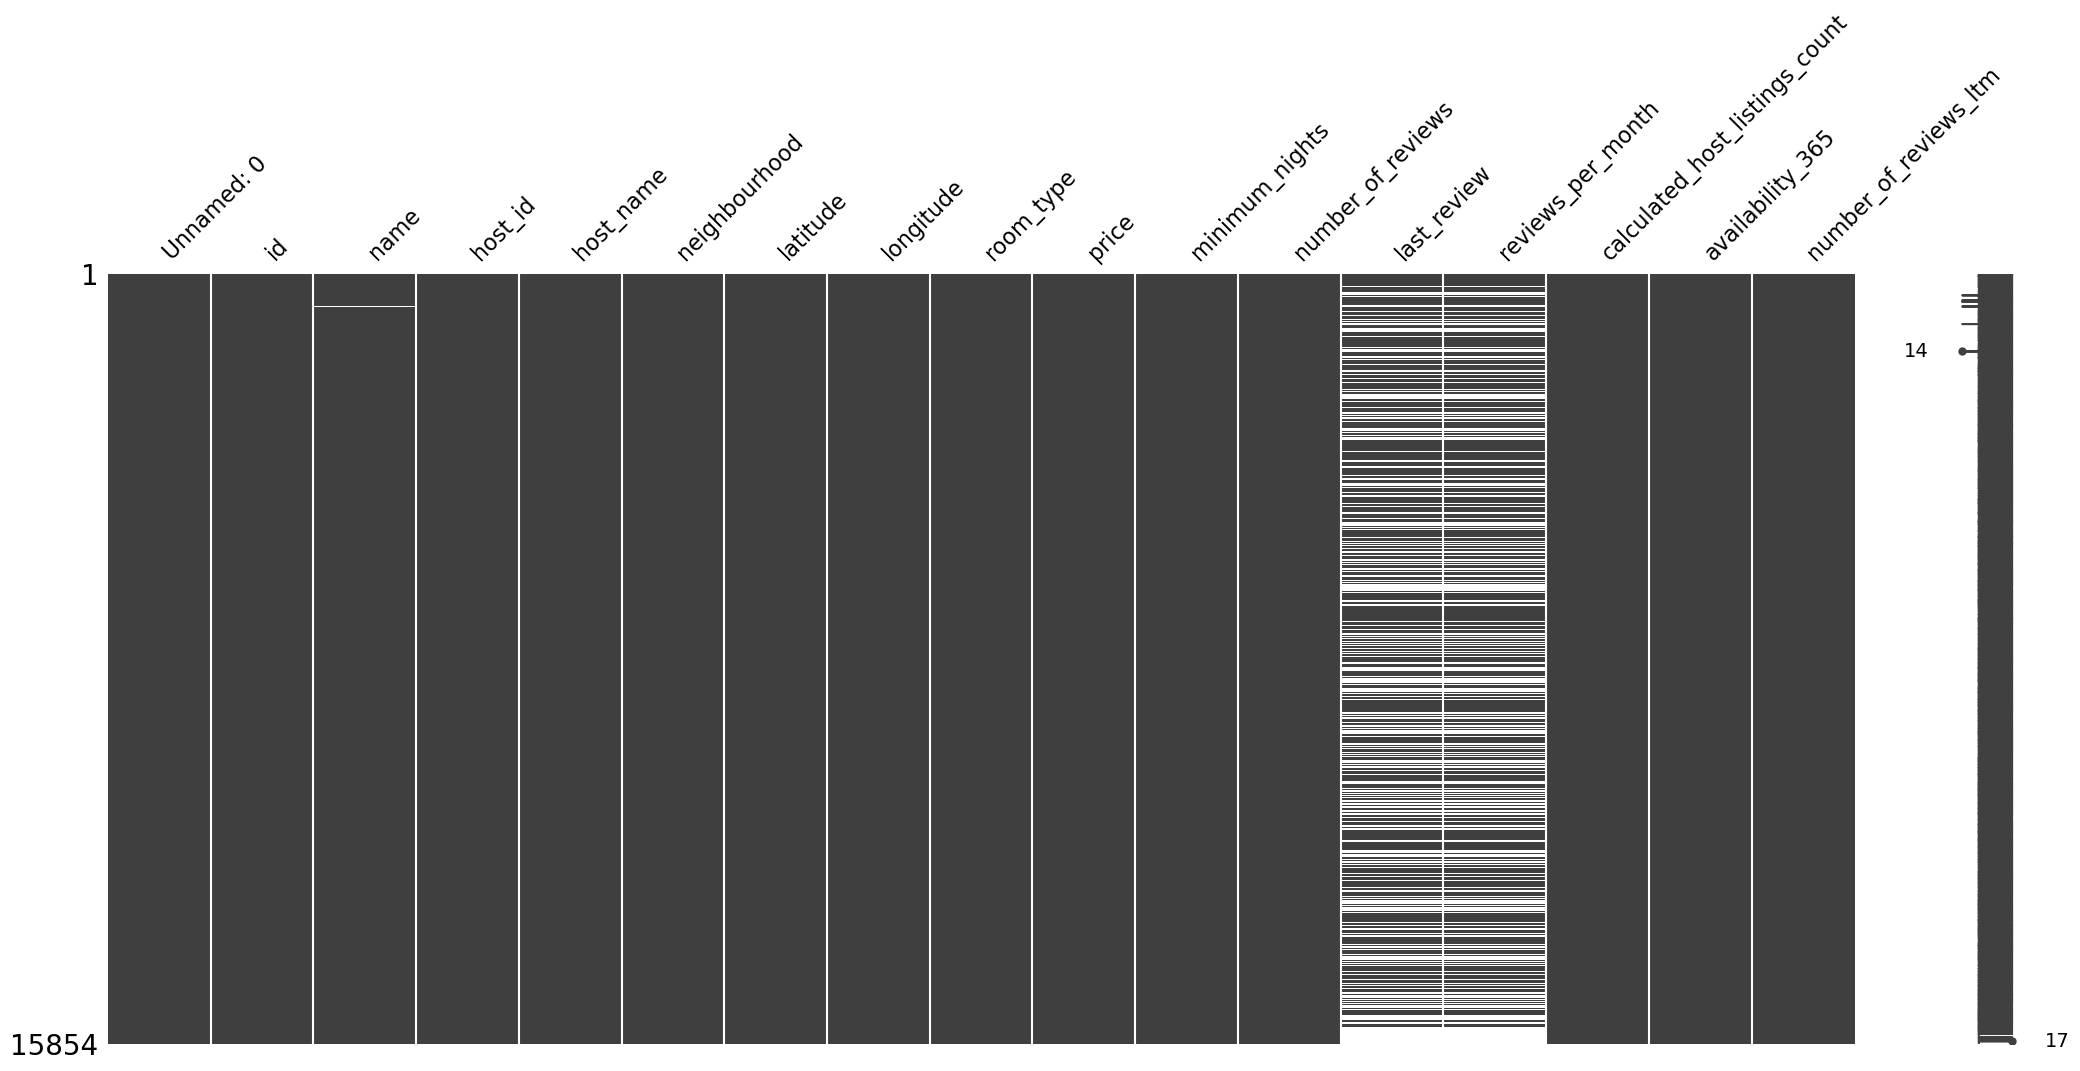

In [167]:
msno.matrix(air_bnb)

Disini kita mencoba melihat hubungan antara kolom dengan missing value dengan kolom lain tanpa missing value, dalam kasus ini kita coba dengan kolom `number_of_reviews`. Setelah kita coba urutkan kolom `number_of_reviews` maka semua missing value pada kolom `reviews_per_month` dan `last_review` berada pada nilai awal dari `number_of_reviews`.

<Axes: >

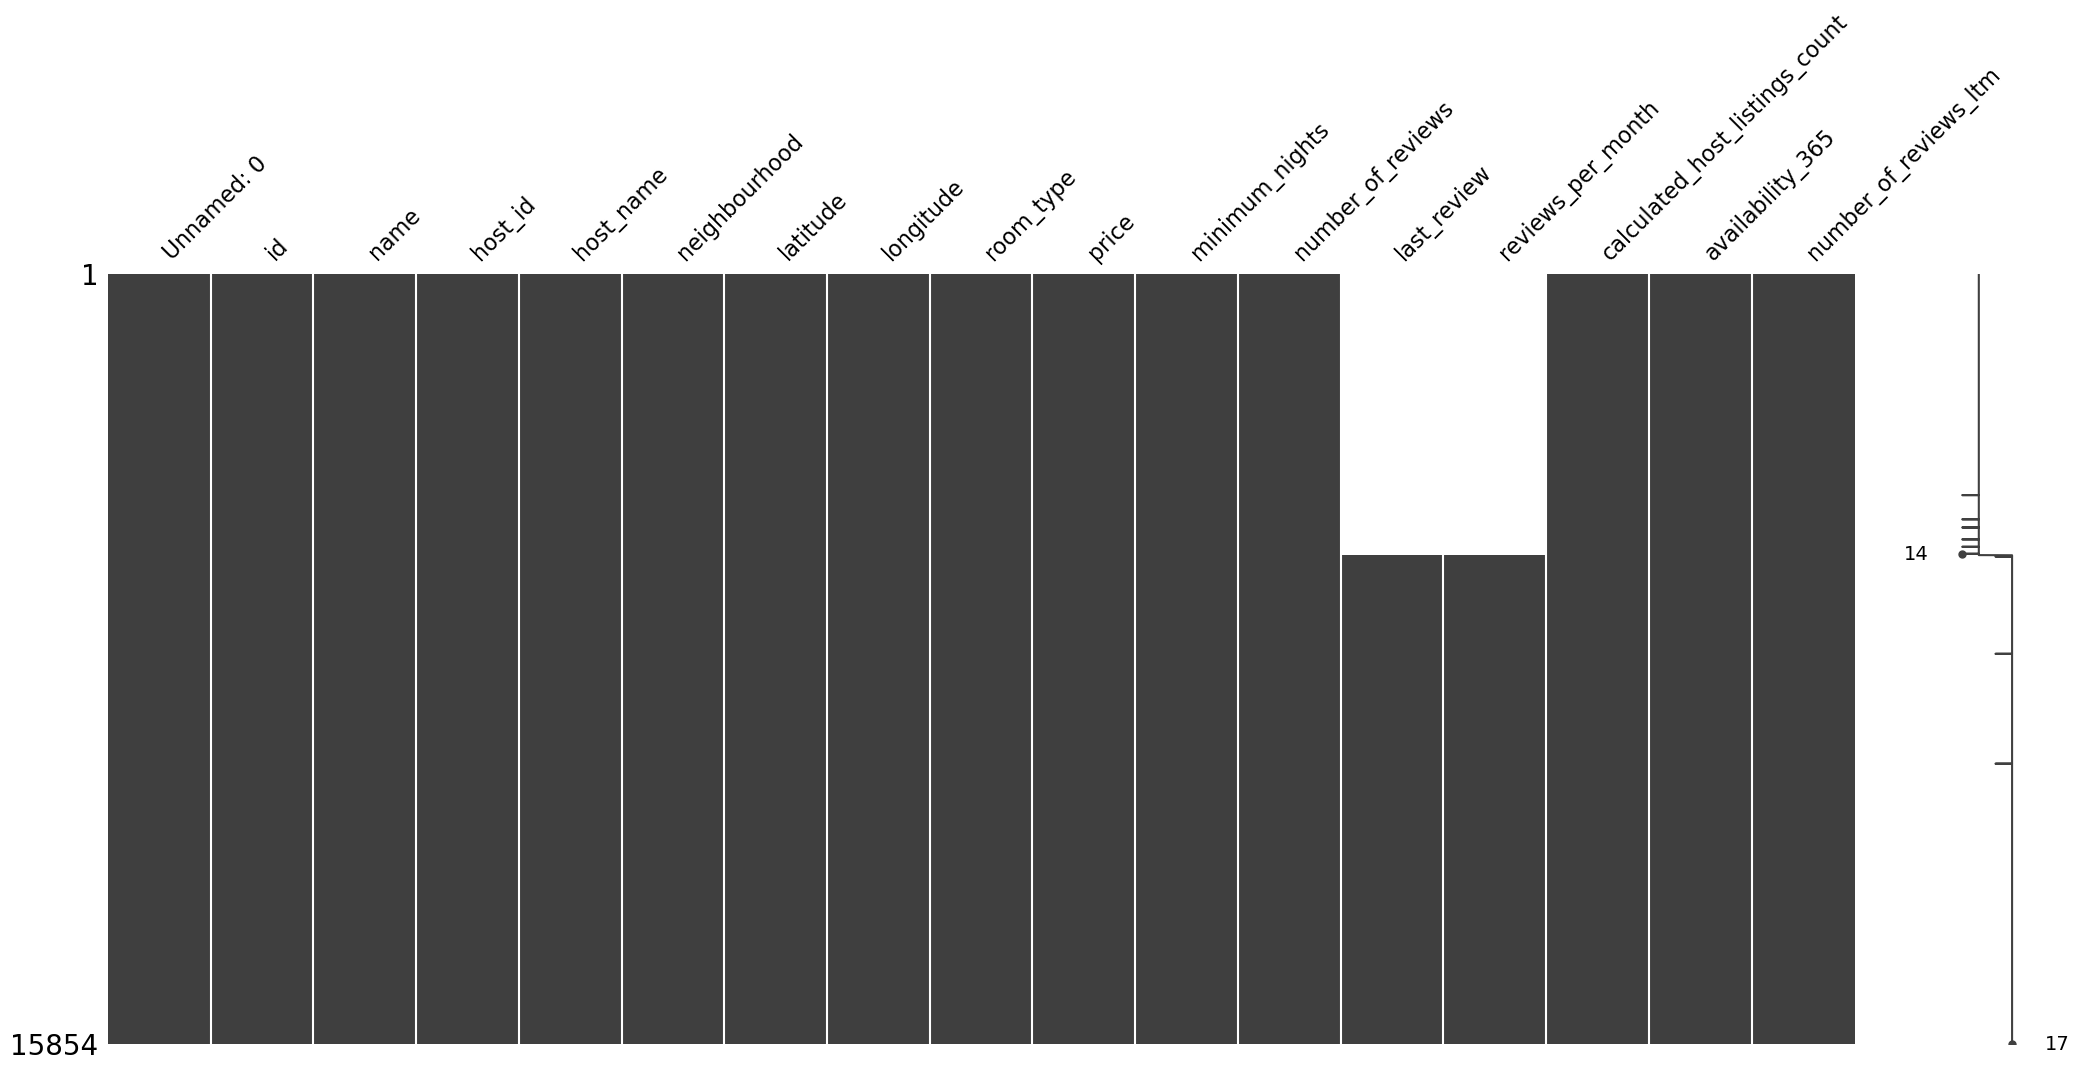

In [168]:
sorted = air_bnb.sort_values('number_of_reviews')
msno.matrix(sorted)

Untuk mendapatkan hasil yang lebih detail dari visualisasi tersebut, kita akan melakukan pengujian untuk mengetahui missing value pada `reviews_per_month` dan `last_review` terjadi pada nilai berapa di kolom `number_of_reviews`.

In [169]:
display(air_bnb[air_bnb['last_review'].isna()]['number_of_reviews'].value_counts(),
air_bnb[air_bnb['reviews_per_month'].isna()]['number_of_reviews'].value_counts())

number_of_reviews
0    5790
Name: count, dtype: int64

number_of_reviews
0    5790
Name: count, dtype: int64

Setelah kita lakukan pengujian ternyata benar bahwa missing value pada `reviews_per_month` dan `last_review` terjadi jika nilai pada kolom `number_of_reviews` adalah 0.

Melihat hasil tersebut kita dapat ambil kesimpulan bahwa tipe missing value dari 2 kolom ini adalah **MNAR (Missing Not At Random)**.

Dengan mengetahui bahwa tipe missing value dari 2 kolom itu adalah **MNAR** maka kita bisa mengisi missing value pada kedua kolom tersebut dengan nilai 0, mengisi dengan nilai 0 tidak akan mengganggu distribusi data yang ada dan kolom `reviews_per_month` dan `last_review` akan siap digunakan.

In [170]:
air_bnb['reviews_per_month'].fillna(0,inplace=True)
air_bnb['last_review'].fillna(0,inplace=True)

Setelah melakukan pengisian missing value pada kolom `reviews_per_month` dan `last_review`, kita lakukan pengecekan lagi untuk kolom lain yang masih memiliki missing value.

In [171]:
air_bnb.isna().sum()

Unnamed: 0                        0
id                                0
name                              8
host_id                           0
host_name                         1
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Disini kita dapat melihat bahwa masih ada 8 missing values pada kolom `name` dan 1 missing value pada kolom `host_name`. Pada kolom ini tidak memungkinkan jika melakukan imputasi dengan menggunakan metode statistik yang ada, karena data yang ada pada kolom tersebut adalah nilai unik, dan jika dilihat bahwa persentase missing value dari kedua kolom itu hanya sebesar **0,05%** dan **0,006%** sehingga kita akan drop missing value dari kedua kolom tersebut.

In [172]:
air_bnb.dropna(subset=['name','host_name'], inplace=True)

Kita juga akan drop kolom `Unnamed: 0`

In [173]:
air_bnb.drop(columns=['Unnamed: 0'], inplace=True)

Setelah melakuan pengisian missing value, maka kita akan melakukan pengecekan apakah ada nilai yang tidak valid dari setiap kolom numerik pada dataset Airbnb

In [174]:
air_bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.584500e+04,1.584500e+04,15845.000000,15845.000000,1.584500e+04,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000
mean,1.580294e+17,1.541645e+08,13.745148,100.559895,3.218580e+03,15.299905,16.663048,0.516464,13.896813,244.319281,3.483496
std,2.946611e+17,1.318845e+08,0.043044,0.050915,2.497917e+04,50.828453,40.623125,0.952948,30.276935,125.849614,8.919083
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104514e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.505717e+07,1.224556e+08,13.738490,100.561400,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.258780e+07,2.392258e+08,13.759490,100.585140,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


### **Handling Anomaly Data**

Disini terdapat data yang tidak valid yaitu pada kolom price terdapat nilai minimum sebesar 0. Kita akan melakukan pengecekan pada row yang memiliki nilai 0 lebih dulu

In [175]:
air_bnb[air_bnb['price']==0]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,0,0.0,1,0,0


In [176]:
air_bnb[air_bnb['price']==0].shape[0]

1

Kita dapat melihat bahwa data yang memiliki `price` dengan nilai 0 hanya 1 data, sehingga kita putuskan untuk drop keseluruhan row yang mengandung value 0 pada kolom `price` 

In [177]:
air_bnb=air_bnb[air_bnb['price']!=0]

Setelah melakukan pengecekan data anomali, maka kita akan melakukan pengecekan outlier dari kolom `price` dan `minimum_nights`

In [178]:
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height(), f'{int(bar.get_width()):,d} ',
            va='top', ha='center', color='black', rotation =90
        )
    return ax

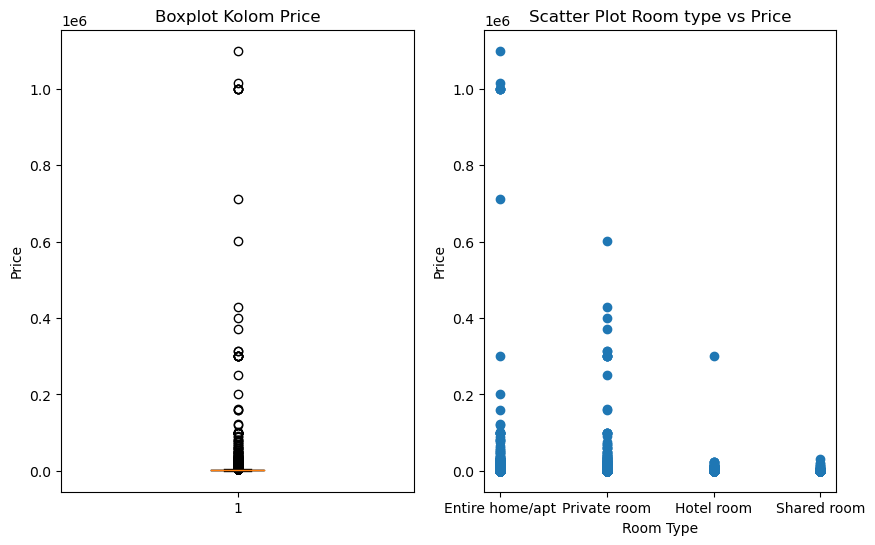

In [179]:
fig, axes = plt.subplots (1,2, figsize= (10,6))

axes[0].boxplot(air_bnb['price'])
axes[0].set_ylabel ('Price')
axes[0].set_title ('Boxplot Kolom Price')

axes[1].scatter (air_bnb['room_type'], air_bnb['price'])
axes[1].set_title ('Scatter Plot Room type vs Price')
axes[1].set_xlabel ('Room Type')
axes[1].set_ylabel ('Price')

plt.show()

Dari grafik diatas kita dapat melihat bahwa terdapat beberapa outlier pada kolom `price`, tapi untuk sementara akan kita pertahankan lebih dulu untuk dilakukan analisa lebih lanjut. 

# Data Analysis


Sebelum melakukan analisis lebih jauh kita perlu mengetahui jenis distribusi untuk setiap kolom numerical pada dataset Airbnb. Disini saya memutuskan untuk melakukan pengetesan dengan menggunakan Uji D'Agostino & Pearson.  

In [180]:
num_only = air_bnb.select_dtypes(include=['int','float']).columns
for i in num_only :
    print (f'normaltest utuk kolom {i}')
    stat,pvalue = normaltest(air_bnb[i])
    alpha = 0.05

    if pvalue > alpha :
        print(f'pvalue={pvalue}.pvalue > {alpha}. Fail to reject H0. Kita dapat asumsikan bawa data terdistribusi normal')
    else :
        print(f'pvalue={pvalue}.pvalue < {alpha}. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal')

normaltest utuk kolom id
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom host_id
pvalue=7.789609162651066e-308.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom latitude
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom longitude
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom price
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom minimum_nights
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom number_of_reviews
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom reviews_per_month
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asums

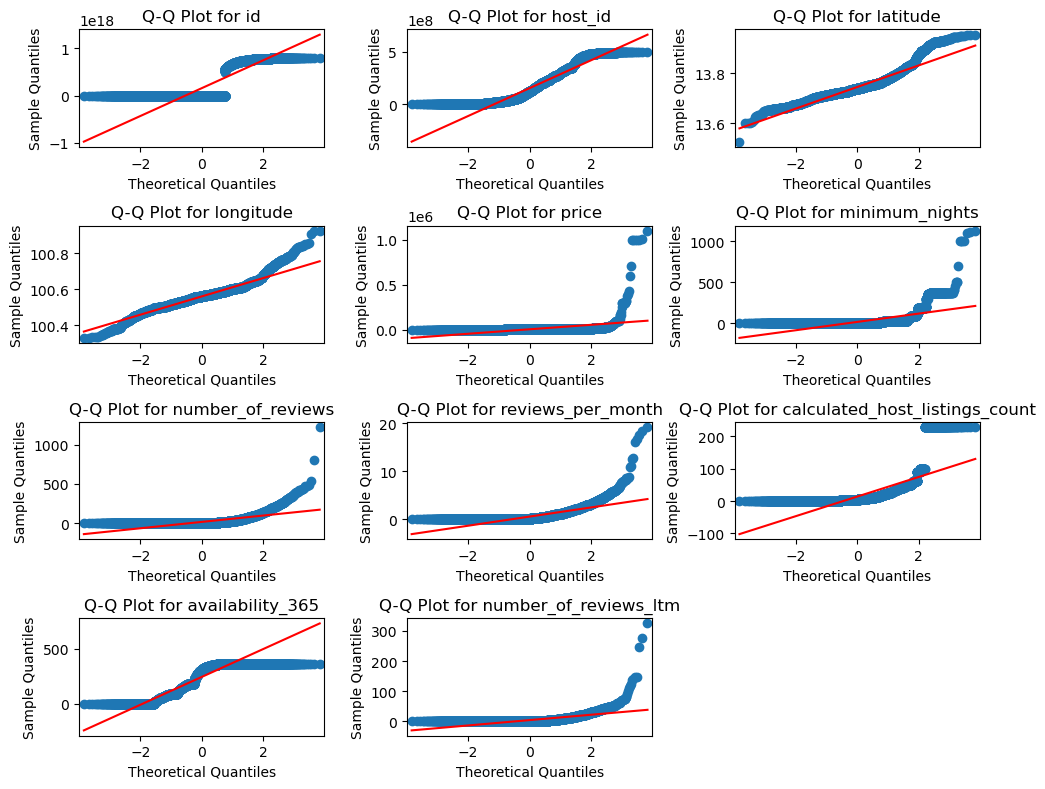

In [181]:
num_only = air_bnb.select_dtypes(include=['int','float']).columns
num_plots = len(num_only)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2*num_rows))

for i, column in enumerate(num_only):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col] if num_rows >= 1 else axes[col]
    
    sm.qqplot(air_bnb[column], line='s', ax=ax)
    ax.set_title(f'Q-Q Plot for {column}')

if num_plots % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

Setelah pengujian tersebut kita mengetahui bahwa seluruh kolom dalam dataset Airbnb **Tidak Terdistribusi Normal**. Setelah melakukan normality distribution test, kita akan mencoba melihat korelasi antara setiap kolom, karena sebelumnya kita sudah mengetahui bahwa data tidak terdistribusi normal makan kita akan menggunakan metode **Spearman** dalam mencari korelasi.

In [182]:
air_bnb_1=air_bnb.copy()
air_bnb_1 = air_bnb_1.drop(columns=['latitude','longitude'])

Disini saya memutuskan untuk melakukan drop sementara pada kolom `latitude` dan `longitude` agar meringankan komputasi sehingga bisa berjalan lebih cepat.

In [183]:
num_only1 = pd.DataFrame(air_bnb_1.select_dtypes(include=['int','float']))
air_bnb_spearman = num_only1.corr(method='spearman')
air_bnb_spearman

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.513686,0.077417,-0.014186,-0.269448,0.017176,0.249719,-0.022587,0.127185
host_id,0.513686,1.000000,0.025363,-0.120663,-0.264585,-0.135218,0.027287,0.011509,-0.064413
price,0.077417,0.025363,1.000000,-0.102580,-0.020728,0.017148,0.084403,-0.000712,0.043591
minimum_nights,-0.014186,-0.120663,-0.102580,1.000000,0.036226,0.019055,-0.127316,-0.124959,0.012542
number_of_reviews,-0.269448,-0.264585,-0.020728,0.036226,1.000000,0.891870,0.220667,-0.263761,0.705379
reviews_per_month,0.017176,-0.135218,0.017148,0.019055,0.891870,1.000000,0.284406,-0.251576,0.813340
calculated_host_listings_count,0.249719,0.027287,0.084403,-0.127316,0.220667,0.284406,1.000000,-0.053446,0.276048
availability_365,-0.022587,0.011509,-0.000712,-0.124959,-0.263761,-0.251576,-0.053446,1.000000,-0.212523
number_of_reviews_ltm,0.127185,-0.064413,0.043591,0.012542,0.705379,0.813340,0.276048,-0.212523,1.000000


Hasil dari perhitungan korelasi diatas akan kita visualisasikan kedalam Heatmap agar lebih mudah untuk dibaca.

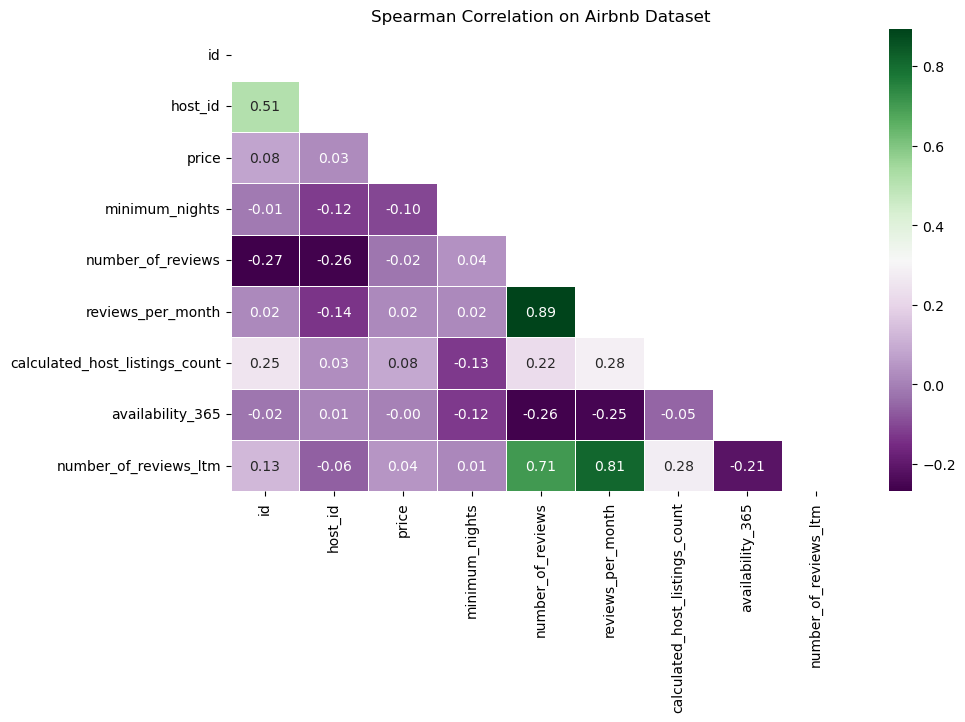

In [184]:
mask = np.triu(np.ones_like(air_bnb_spearman, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(air_bnb_spearman, annot=True, cmap='PRGn', fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Spearman Correlation on Airbnb Dataset')
plt.show()

Dari hasil pengetesan korelasi tersebut kita dapat mengetahui beberap korelasi antar kolom yang memiliki korelasi terkuat (> ±0,5)  :

| Column Paired  |Corr Val. |
|------|-----|
| Host Id - id | 0,51|
| reviews_per_month	 - number_of_reviews | 0,89|
| number_of_reviews_ltm	 - number_of_reviews | 0,71|
| reviews_per_month	 - number_of_reviews_ltm | 0,81|

Dari kolom dengan korelasi terkuat tersebut, nilai korelasi mejadi tinggi  karena hasil penghitungan tiap kolom didapat dari kolom lainnya. Hal ini tidak cukup untuk jadi dasar bagi kita untuk mendapatkan hasil dari tujuan dilakukannya analisa ini. Kita akan mencoba mengeksplorasi lebih jauh dari data-data yang ada di dataset ini. 


## Traveler and Destination Mapping
Sebelum mencari tahu terkait tingkat occupancy hotel, saya akan coba memetakan pengunjung Airbnb bangkok berdasarkan tingkat popularitas yang bisa didapatkan dari jumlah review.

Dalam analisa Popularitas ini nantinya akan mengetahui : 
- District/neighbourhood mana yang paling banyak dikunjungi 
- Wisata apa yang paling diminati oleh wisatawan 
- Jenis penginapan yang paling banyak disukai
- Tipe wisatawan berdasarkan budget yang dihabiskan untuk penginapan

Untuk mencapai hal tersebut kita perlu membuat 2 kolom baru, yaitu :
* `District Category` 
* `Price Category` 

**District Category**

Kita akan memberikan klasifikasi bagi district-district yang ada di Bangkok dengan kategori sebagai berikut :
| District Category  |District Name/Neighbourhood |
|------|-----|
| Commercial & Trade and Service Area | Ratchathewi, Bang Na, Khlong San,Bang Rak, Khlong Toei, Vadhana,Parthum Wan,Don Mueang,Lat Phrao|
|Urban Living and New Experience| Bang Kapi,Bang Kho laen, Rat Burana, Chatu Chak, Phaya Thai,Sai Mai, Lat Krabang,Huai Khwang,Bang Sue, Nong Chok,Phra Khanong, Thawi Watthana,Pra Wet,Thon buri, Suanluang,Lak Si, Bueng Kum,Saphan Sung, Min Buri, Khan Na Yao, Khlong Sam Wa,Bang Khen,Bangkok Noi,Nong Khaem, Thung khru, Bang Khae,Taling Chan, Bang Bon|
|Temple and Religious | Din Daeng, Sathon,Bangkok Yai, Wang Thong Lang, Phasi Charoen,Phra Nakhon,Yan na wa,Dusit, Samphanthawong,Bang Phlat,Chom Thong,Pom Prap Sattru Phai,Bang Khun thain|

*source : research on each district from Google, Tripadvisor and personal experience (per 14 April 2024)*


In [185]:
district_category_list = {
    'Commercial & Trade and Service Area': ['Ratchathewi', 'Bang Na', 'Khlong San', 'Bang Rak', 'Khlong Toei', 'Vadhana', 'Parthum Wan', 'Don Mueang', 'Lat Phrao'],
    'Urban Living and New Experience': ['Bang Kapi', 'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Phaya Thai', 'Sai Mai', 'Lat Krabang', 'Huai Khwang', 'Bang Sue', 'Nong Chok', 'Phra Khanong', 'Thawi Watthana', 'Pra Wet', 'Thon buri', 'Suanluang', 'Lak Si', 'Bueng Kum', 'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa', 'Bang Khen', 'Bangkok Noi', 'Nong Khaem', 'Thung khru', 'Bang Khae', 'Taling Chan', 'Bang Bon'],
    'Temple and Religious': ['Din Daeng', 'Sathon', 'Bangkok Yai', 'Wang Thong Lang', 'Phasi Charoen', 'Phra Nakhon', 'Yan na wa', 'Dusit', 'Samphanthawong', 'Bang Phlat', 'Chom Thong', 'Pom Prap Sattru Phai', 'Bang Khun thain']
}

In [186]:
def district_category(district):
    for category, districts in district_category_list.items():
        if district in districts:
            return category
    return 'Unknown'

air_bnb['District Category'] = air_bnb['neighbourhood'].map(district_category)

**Price Category**

Kita akan menentukan kategori harga ini berdasarkan dari distribusi harga penginapan yang ada menggunakan quantile.

In [187]:
air_bnb['price'].quantile([0.15,0.3,0.45,0.6,0.75])

0.15     720.00
0.30    1000.00
0.45    1300.00
0.60    1690.00
0.75    2430.25
Name: price, dtype: float64



Berdasarkan distribusi data price yang ada, kita akan mengelompokan hotel berdasarkan harga sebagai berikut :
| Price Category|Price (*Baht Thailand (฿)*) |
|------|-----|
|Ultra Cheap| <=720 |
|Cheap| >720 and <=1.000|
|Budget| >1.000 and <=1.300|
|Economy| >1.300 and <= 1.690|
|First Class| >1.690 and <=2.430|
|Luxury Class| > 2430|

In [188]:
def price_category(price):    
    if price <= 720.00000:
        return 'Ultra Cheap'
    elif price > 720.00000 and price <= 1000.0000:
        return 'Cheap'
    elif price > 1000.00000 and price <= 1300.00000:
        return 'Budget'
    elif price > 1300.00000 and price <= 1690.00000:
        return 'Economy'
    elif price > 1690.00000 and price <= 2430.00000:
        return 'First Class'
    else:
        return 'Luxury Class'


air_bnb['price category'] = air_bnb['price'].apply(price_category)

### *Ditrict Terpopuler*

In [189]:
def annotate_bars(ax):
    for bar in ax.patches:
        x = bar.get_width()  
        y = bar.get_y() + bar.get_height() / 2 
        ax.text(
            x, y, f'{bar.get_width():d}',
            va='center', ha='left', color='black' 
        )
    return ax

In [190]:
def annotate_bars_float(ax):
    for bar in ax.patches:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        ax.text(
            x, y, f'{bar.get_height():.2f}',
            va='bottom', ha='center', color='black'
        )
    return ax

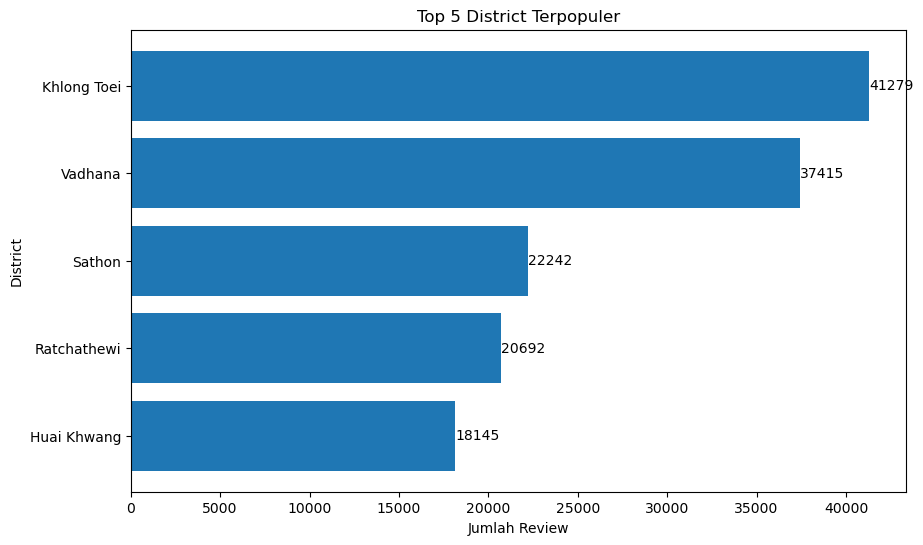

In [191]:
air_bnb['number_of_reviews'] = air_bnb['number_of_reviews'].astype(int)
popularity_per_district = air_bnb.groupby('neighbourhood')['number_of_reviews'].sum()
popularity_per_district = popularity_per_district.nlargest(5).sort_values()

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(
    popularity_per_district.index,
    popularity_per_district.values
)
ax.set(
    xlabel='Jumlah Review',
    ylabel='District', 
    xscale='linear'
)
annotate_bars(ax)  
plt.title('Top 5 District Terpopuler')
plt.show()

#### **INSIGHT**
5 District yang menjadi destinasi paling populer bagi para wisatawan adalah :
- **Khlong Toei** 
- **Vadhana** 
- **Sathon**
- **Ratchathewi**
- **Bang Rak**

### *Jenis Wisata Terpopuler*

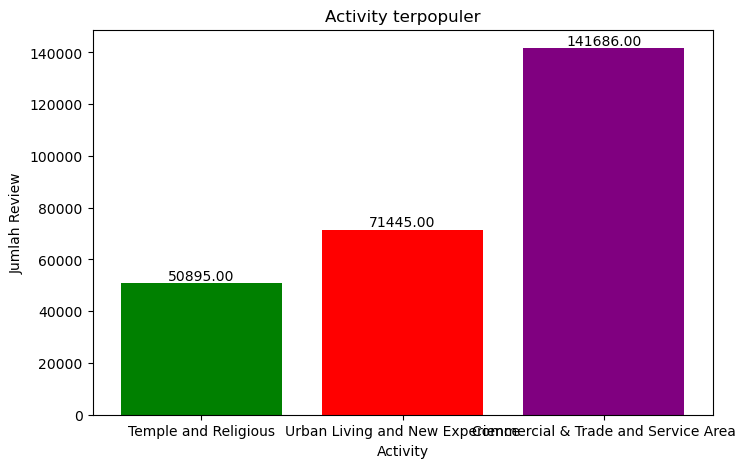

In [192]:
popular_activity = air_bnb.groupby('District Category')['number_of_reviews'].sum()

popular_activity = popular_activity.sort_values()

fig, ax = plt.subplots(figsize=(8, 5))

colors = ['green', 'red', 'purple']
ax.bar(
    popular_activity.index,
    popular_activity.values,
    color=colors
)
ax.set(
    xlabel='Activity',
    ylabel='Jumlah Review', 
)
annotate_bars_float(ax)  
plt.title('Activity terpopuler')  
plt.show()

#### **INSIGHT**
Kegiatan atau tujuan yang menjadi favorit bagi wisatawan adalah pusat perbelanjaan, bisnis dan kegiatan komersial lain seperti mengunjungi restoran maupun bar.

### *Jenis Penginapan yang Paling Banyak Disukai*

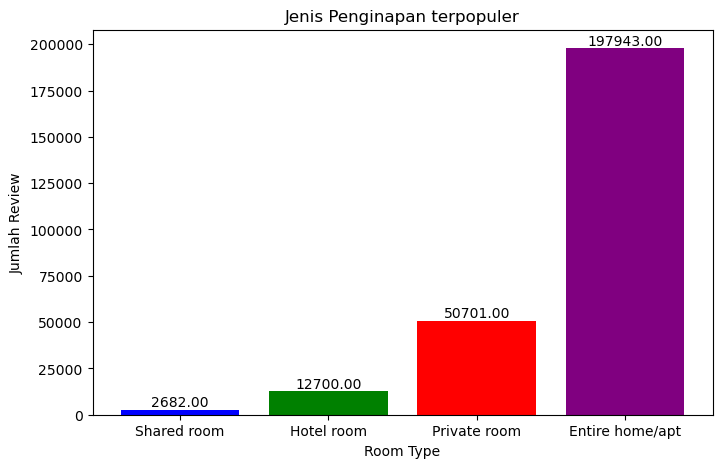

In [193]:
popular_roomtype = air_bnb.groupby('room_type')['number_of_reviews'].sum()

popular_roomtype = popular_roomtype.sort_values()

fig, ax = plt.subplots(figsize=(8, 5))

colors = ['blue','green', 'red', 'purple']
ax.bar(
    popular_roomtype.index,
    popular_roomtype.values,
    color=colors
)
ax.set(
    xlabel='Room Type',
    ylabel='Jumlah Review', 
)
annotate_bars_float(ax)  
plt.title('Jenis Penginapan terpopuler')  
plt.show()

#### **INSIGHT**
Enitre Home/Apartment masih menjadi jenis penginapan yang paling banyak disukai

### *Tipe Wisatawan Berdasarkan Buget*

Dari klasifikasi harga yang sudah kita tetapkan sebelumnya, kita akan menjadi 3 yaitu :

- Budget Traveler : untuk penginapan dengan kategori Ultra Cheap & Cheap
- Promo Traveler : untuk penginapan dengan kategori Economy & Budget
- Luxury Travele : untuk penginapan dengan kategori First Class & Luxury Class

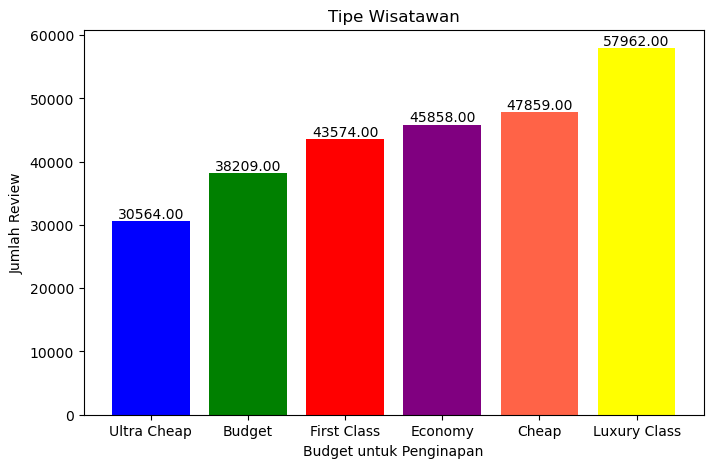

In [194]:
traveler_type = air_bnb.groupby('price category')['number_of_reviews'].sum()

traveler_type = traveler_type.sort_values()

fig, ax = plt.subplots(figsize=(8, 5))

colors = ['blue','green', 'red', 'purple','tomato','yellow']
ax.bar(
    traveler_type.index,
    traveler_type.values,
    color=colors
)
ax.set(
    xlabel='Budget untuk Penginapan',
    ylabel='Jumlah Review', 
)
annotate_bars_float(ax)  
plt.title('Tipe Wisatawan')  
plt.show()

#### **INSIGHT**
Tipe wisatawan yang paling banyak mengunjungi bangkok adalah **Luxury Traveler** yang kemudian diikuti oleh **Promo Traveler** dan yang paling sedikit adalah **Backpacker Traveler**.

### **TRAVELER MAPPING** 
- Wisata belanja maupun untuk tujuan berbisnis menjadi jenis kegiatan yang paling banyak disukai para wisatawan yang mengunjungi Bangkok, dengan distrik yang menjadi favorit adalah :
    - Khlong Toei
    - Vadhana
    - Ratchathewi
- Wisatawan yang mengunjungi Bangkok didominasi oleh Luxury Traveler yang memiliki budget untuk penginapan sebesar ฿1.690 - ฿2.430/room/night
- Mayoritas wisatawan akan memimilih penginapan dengan tipe Entire home/apartment



## **Hotel Distribution**

Kita sudah memetakan tipe wisatawan yang mengunjungi Bangkok, sekarang kita akan mencari tahu terkait distribusi tipe kamar yang ada berdasarkan kolom `room_type`.

room_type
Entire home/apt    8911
Private room       5762
Hotel room          648
Shared room         523
Name: count, dtype: int64


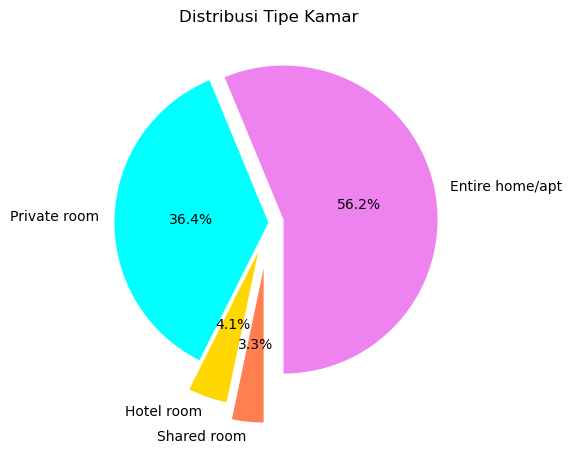

In [195]:
room_type_distribution = air_bnb['room_type'].value_counts()
print (room_type_distribution)

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(
    room_type_distribution,
    labels = room_type_distribution.index,
    autopct = '%1.1f%%',
    colors = ['violet','aqua', 'gold','coral'],
    startangle  = 270,
    pctdistance = 0.5,
    explode = [0.1,0,0.2,0.3]
)
ax.set_title('Distribusi Tipe Kamar')    
plt.show()

Dari Pie Chart ini kita dapat mengetahui bahwa penginapan dengan tipe ***Entire home*** atau keselurahan unit bangunan masih mendominasi supply penginapan Airbnb di Bangkok dengan persentase sebesar **56,2%** dan diikuti dengan ***Private room*** sebesar **36,4%** 

Kemudian kita akan melihat bagaimana jumlah penginapan pada setiap District.

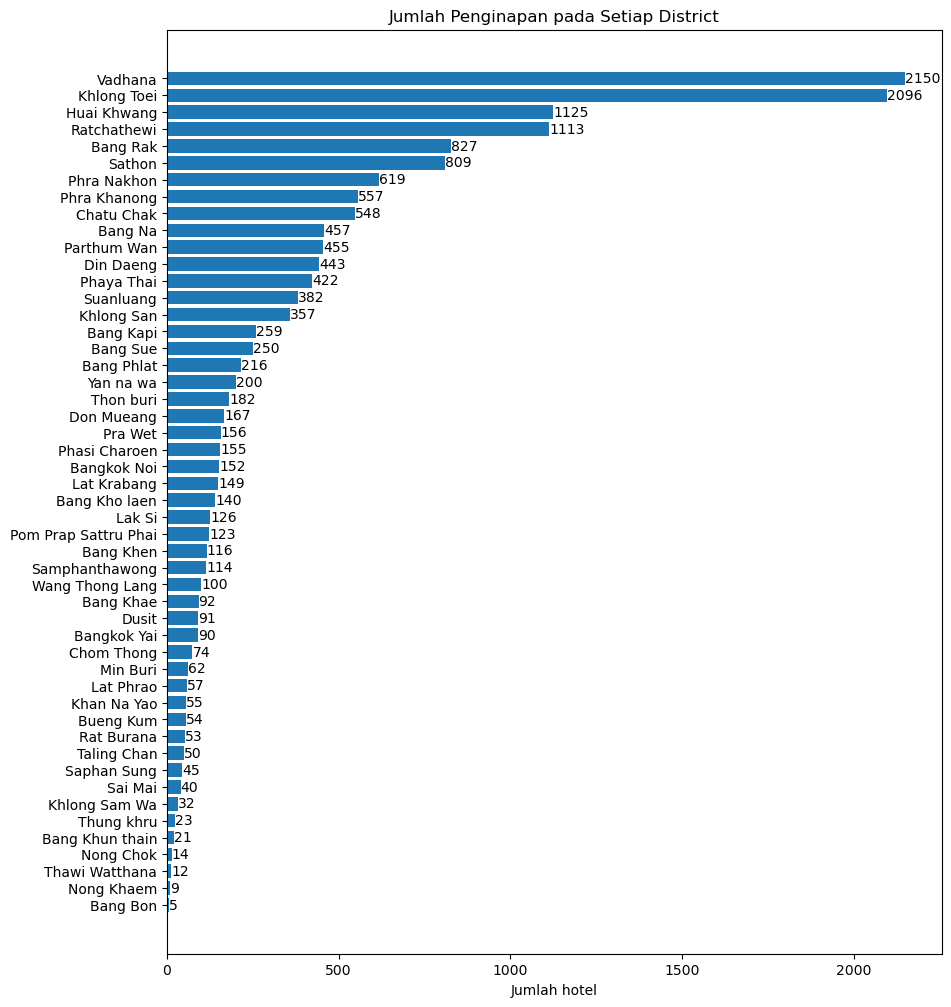

In [196]:
hotel_per_district = air_bnb.groupby('neighbourhood').count()['id']
hotel_per_district = hotel_per_district.sort_values(ascending=True)

fig, ax = plt.subplots (figsize = (10,12))

ax.barh (
    hotel_per_district.index,
    hotel_per_district.values
)
ax.set (
    xlabel ='Jumlah hotel',
    xscale = 'linear'
)
annotate_bars(ax)
plt.title ('Jumlah Penginapan pada Setiap District')
plt.show()    

In [219]:
lat_bangkok =13.736717 
long_bangkok = 100.523186

import folium.vector_layers


bangkok_map= folium.Map (location=[lat_bangkok,long_bangkok],
                         tiles='CartoDB positron',
                         zoom_start=8)

districts_shapefile = 'district.shp'
gdf = gpd.read_file(districts_shapefile)

for idx, row in gdf.iterrows():
    coordinates = list(row['geometry'].exterior.coords)
    folium.Polygon(locations=coordinates, 
                   fill=True, color='black', 
                   fill_color='blue',
                   fill_opacity=0.3
    ).add_to(bangkok_map)

hotel = plugins.MarkerCluster().add_to (bangkok_map)

for lat,long,label in list(zip(air_bnb['latitude'],air_bnb['longitude'],air_bnb['neighbourhood'])) :
    folium.vector_layers.CircleMarker(
        [lat,long],
        popup=label
    ).add_to(hotel)

# bangkok_map

**Ka, minta tolong untuk running folium harap di uncomment bangkok_map. bangkok_map harus di comment karena memakan memmory terlalu banyak sehingga tidak bisa diupload di Github. Terimakasih**

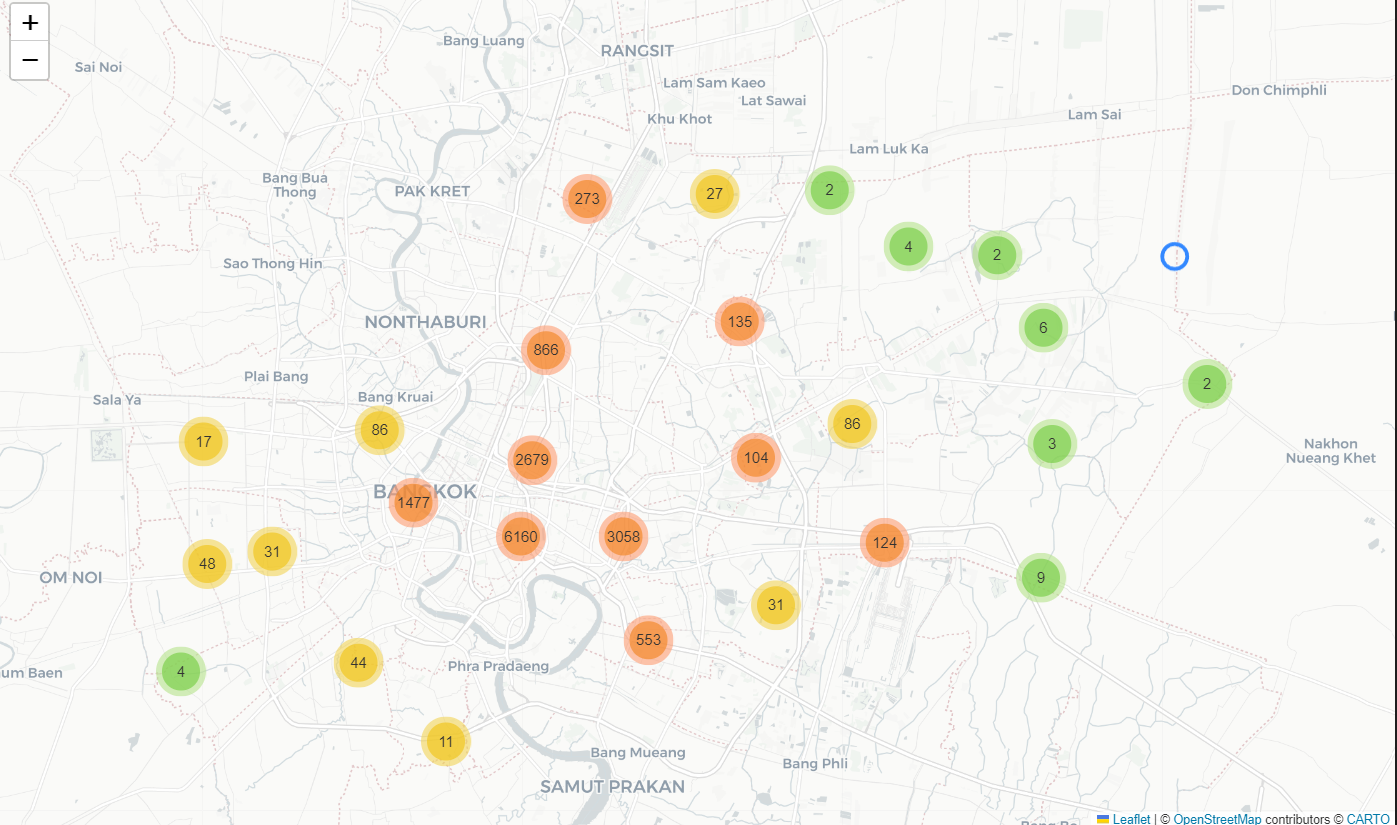

penginapan terbanyak ada di :
- **Vadhana** 
- **Khlong Toei** 
- **Huai Khang**
- **Ratchathewi**
- **Bang Rak**


Keselurahan daerah itu berada di pusat kota bangkok yang menjadi pusat bagi tempat perbelanjaan dan restoran-restoran kelas atas.



Setelah kita mengetahui persebaran penginapan, kita ingin melihat jumlah penginapan dari masing-masing District Category 

                     District Category    id
0  Commercial & Trade and Service Area  7679
1      Urban Living and New Experience  5110
2                 Temple and Religious  3055


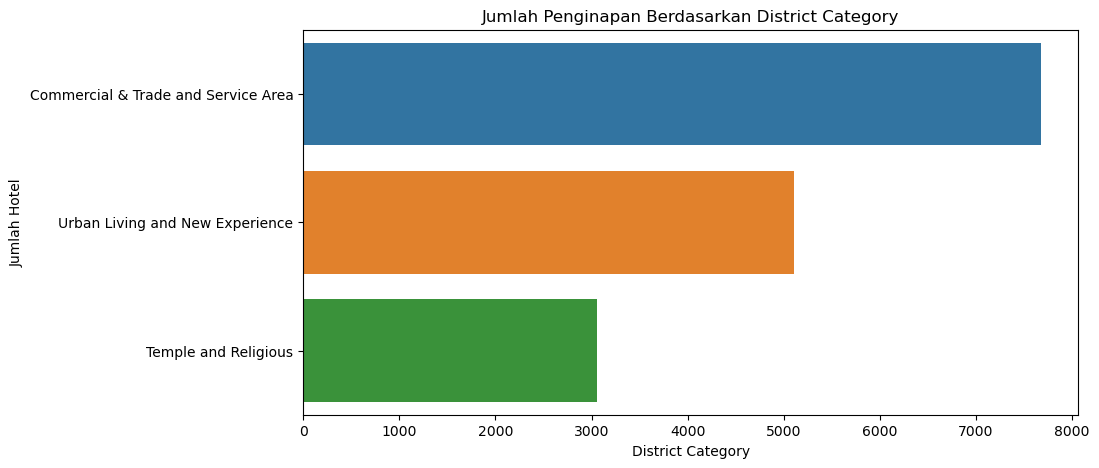

In [198]:
hotel_per_category = pd.DataFrame(air_bnb.groupby('District Category').count()['id'])
hotel_per_category = hotel_per_category.sort_values(by= 'id',ascending=False).reset_index()

print (hotel_per_category)
fig, ax = plt.subplots (figsize = (10,5))

sns.barplot (
    data=hotel_per_category,
    x = 'id',
    y = 'District Category',
    # hue='District Category',
    ax=ax
)
ax.set (
    xlabel ='District Category',
    ylabel ='Jumlah Hotel'
)
plt.title ('Jumlah Penginapan Berdasarkan District Category')

plt.show()   

### **INSIGHT**
Jumlah hotel paling banyak ada di District dengan Category **Commercial & Trade and Service Area**  dengan jumlah 7.679 penginapan. 



## **OVERSUPPLY ANALYSIS**
Dengan insight yang didapat dari distribusi hotel, dapat diketahui bahwa jumlah penginapan di area Commercial & Trade and Service Area adalah yang tertinggi,dengan supply yang tinggi menimbulkan kemungkinan bahwa demmand untuk penginapan di daerah itu memang tinggi. Untuk mengetahui apakah demmand daerah itu memang tinggi atau terjadi oversupply akan dilakukan analisa dengan membandingkan occupancy hotel untuk 365 hari kedepan.

Untuk mendapatkan gambaran occupancy yang akurat, maka akan ditambahkan kolom dengan nama `% Occupancy` untuk menampilkan informasi persentase occupancy dari setiap hotel.

In [199]:
air_bnb['% Occupancy'] = ((365-air_bnb['availability_365'])/365)*100

In [200]:
air_bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'District Category', 'price category',
       '% Occupancy'],
      dtype='object')

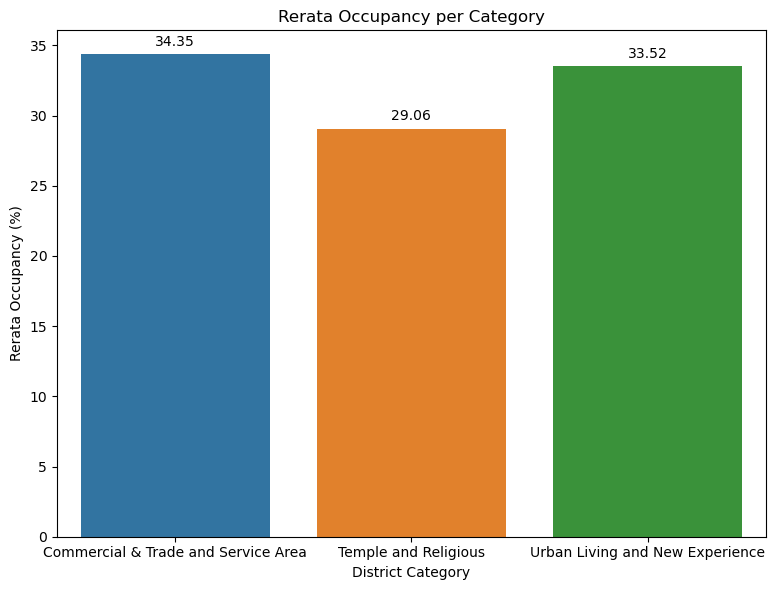

In [201]:
occupancy_per_category = air_bnb.groupby('District Category')['% Occupancy'].mean().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=occupancy_per_category, x='District Category', y='% Occupancy')
plt.title('Rerata Occupancy per Category')
plt.xlabel('District Category')
plt.ylabel('Rerata Occupancy (%)')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()


Berdasarkan grafik diatas kita dapat mengetahui bahwa terdapat perbedaan occupancy antara **Commercial & Trade and Service Area** dan **Urban Living and New Experience** tapi kita belum dapat menentukan apakah perbedaan tersebut adalah signifikan atau tidak, oleh karena itu akan dilakukan signifikansi test menggunakan Uji Kruskal Wallis.

Akan ditentukan dulu Hipotesa Awal (H0) dan Hipotesa Alternatif (H1):

**H0** : Tidak ada perbedaan occupancy yang signifikan  di antara kategori-kategori di "District Category"

**H1** : Terdapat perbedaan occupancy yang signifikan  di antara kategori-kategori di "District Category"

In [202]:
district_groups = [air_bnb[air_bnb['District Category'] == category]['% Occupancy'] for category in air_bnb['District Category'].unique()]

statistic, p_value = kruskal(*district_groups)
alpha = 0.05

print("Hasil uji Kruskal-Wallis =")
print("Nilai p-value:", p_value)

if pvalue > alpha :
        print(f'pvalue={pvalue}.pvalue > {alpha}. Fail to reject H0. Kita dapat asumsikan bahwa tidak ada perbedaan signifikan')
else :
        print(f'pvalue={pvalue}.pvalue < {alpha}. Reject H0. Kita dapat asumsikan bahwa terdapat perbedaan yang signifikan')

Hasil uji Kruskal-Wallis =
Nilai p-value: 1.9439934937604734e-18
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bahwa terdapat perbedaan yang signifikan


Dari Uji Kruskal Wallis diatas dapat diketahui bahwa nilai p-value adalah 1.94e-18 dan terdapat perbedaan signifikan antar setiap kategori pada district category.

### **INSIGHT**

Berdasarkan diagram diatas kita dapat mengetahui bahwa memang rerata persentase occupancy untuk Commercial & Trade and Service Area adalah yang tertinggi. Meskipun memiliki persetase occupancy tertinggi tapi secara umum rata-rata occupancy masih berada **dibawah 40%** yang memberikan validasi bahwa hotel di Bangkok mungkin sudah berada dalam kondisi ***oversupply***.



## **PROSPECTIVE MARKET ANALYSIS**

Setelah mengetahui bahwa meskipun market penginapan di Bangkok sudah mencapai fase Oversupply, tapi disini akan dicoba untuk mencari tahu apakah masih ada kelas atau kategori yang masih economic feasible untuk dilakukan ekspansi. Analisa ini akan melihat perbandingan occupancy antara hotel yang dibedakan berdasarkan district category dan price category  

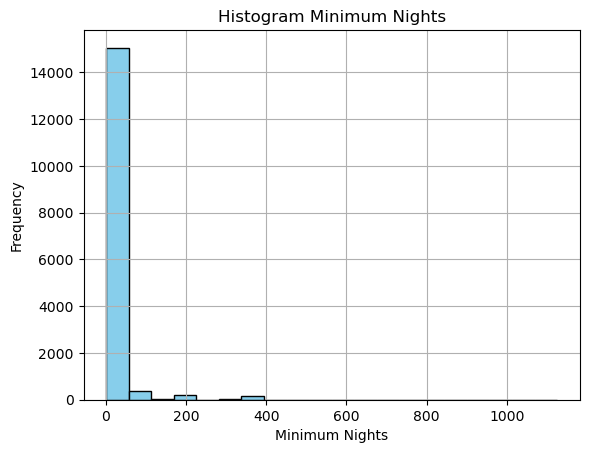

Nilai unik dari Minimum Nights : 
[   3    1   60    7  250    2   15   30   28   21   27    4  180   90
    5  358 1125   29   14  200  365  120    9   12  300  360  100   10
   45   23    6   84  370   24   31   50   19   20   75    8   25   40
   26   59   58  170  399  998   13   22  356   16  183  700  150   35
  355  500   89   80   18   11   85  135  198   88  160  109  148   51
 1115  113   62  450  270   55  208 1000   17  999  400   99 1095   39
  190  364]
Nilai Quartil dari Minimum Nights : 
0.00       1.0
0.25       1.0
0.50       1.0
0.75       7.0
1.00    1125.0
Name: minimum_nights, dtype: float64


In [203]:
plt.hist(air_bnb['minimum_nights'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f"Nilai unik dari Minimum Nights : \n{air_bnb['minimum_nights'].unique()}")

print(f"Nilai Quartil dari Minimum Nights : \n{air_bnb['minimum_nights'].quantile([0,0.25,0.5,0.75,1])}")

Berdasarkan persebaran data yang ada, kita akan mengelompokan hotel berdasarkan minimum nights yang didapatkan dari distribusi minimum nights yang ada :
| Hotel Type|Minimum Nights |
|------|-----|
|Yearly| >=365 Days |
|Dormitory| >=60 Days and <365 Days|
|Residential Hotel| >=30 Days and <60 Days|
|Transient Hotel| <30 Days|


In [204]:
def hotel_type(min_nights):    
    if min_nights < 30:
        return 'Transient Hotel'
    elif min_nights >= 30 and min_nights < 60:
        return 'Residential Hotel'
    elif min_nights >= 60 and min_nights < 365:
        return 'Dormitory'
    else:
        return 'Yearly'

air_bnb['hotel_category'] = air_bnb['minimum_nights'].apply(hotel_type)

Setelah menambahkan kolom Hotel Category, kita lakukan perbandingan secara umum antara Hotel Category dan Occupancy

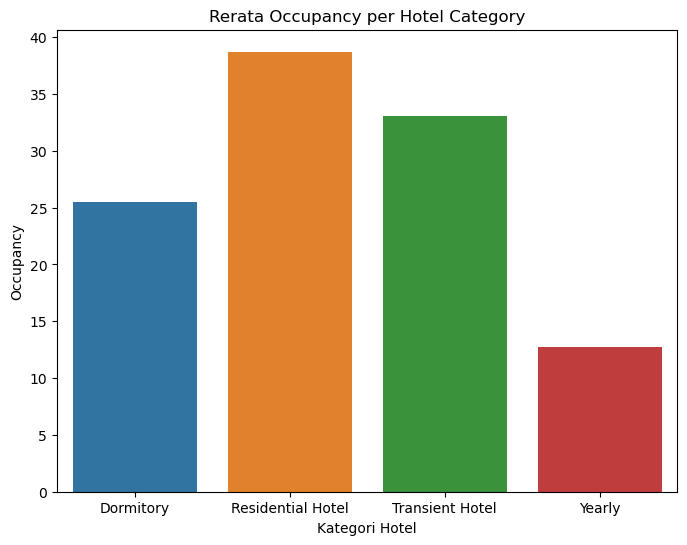

In [205]:
occupancy_per_hotel_category = pd.DataFrame(air_bnb.groupby('hotel_category')['% Occupancy'].mean()).reset_index()

fig, ax= plt.subplots(figsize=(8, 6))
sns.barplot (
    data= occupancy_per_hotel_category,
    x = 'hotel_category',
    y = '% Occupancy'
)

ax.set (
    xlabel = 'Kategori Hotel',
    ylabel = 'Occupancy'
)

plt.title('Rerata Occupancy per Hotel Category')
plt.show()

Dari grafik diatas kita dapat melihat bahwa hotel dengan tipe Residential Hotel adalah hotel dengan occupancy tertinggi, tapi kita ingin mengatahui dengan lebih detail sebenarnya hotel dengan tipe apa dan pada kategori district mana yang sebenarnya memiliki occupancy tertinggi.

Oleh karena itu kita akan coba buat perbandingan antara Occupancy berdasarkan Hotel Category yang ada pada tiap District Category. 

In [206]:
pivot_per_category = pd.pivot_table(air_bnb, values='% Occupancy', index=['hotel_category'], columns=['District Category'], aggfunc='mean')
pivot_per_category

District Category,Commercial & Trade and Service Area,Temple and Religious,Urban Living and New Experience
hotel_category,,,
Dormitory,28.383731,23.718200,22.050117
Residential Hotel,39.313465,38.745758,37.674016
Transient Hotel,34.226610,28.549866,34.026563
Yearly,18.427635,19.342466,4.465753


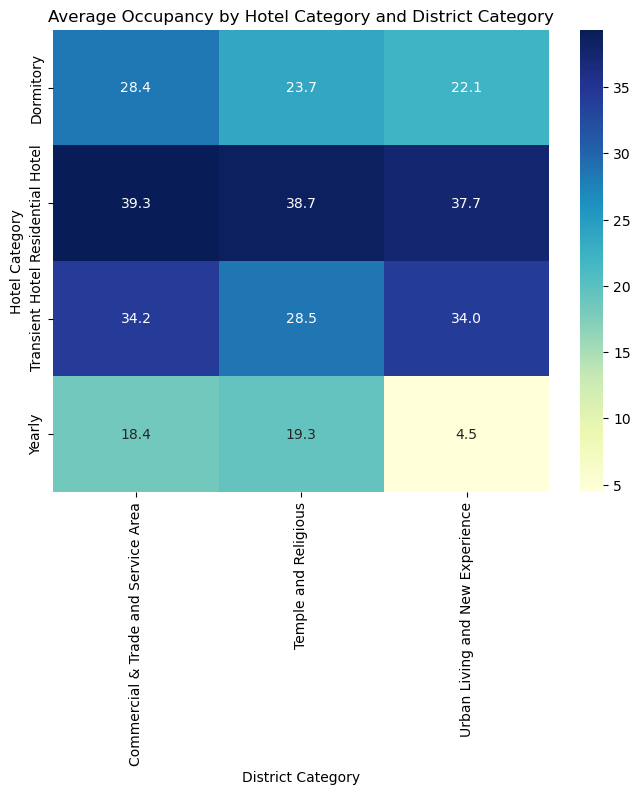

In [207]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_per_category, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Average Occupancy by Hotel Category and District Category')
plt.xlabel('District Category')
plt.ylabel('Hotel Category')
plt.show()

Dari Heatmap diketahui bahwa penginapan dengan tipe Residential Hotel pada Commercial & Trade and Service Area memiliki occupancy tertinggi, tapi kita ingin mengatahui district mana pada Commercial & Trade and Service Area yang memiliki occupancy tertinggi.

Oleh karena itu kita akan membandingkan Occupancy dari setiap kategori hotel pada setiap district untuk melihat penginapan dengan kategori seperti apa dan pada district mana yang memiliki occupancy tertinggi.

In [208]:
pivot_per_neighbourhood = pd.pivot_table(air_bnb, values='% Occupancy', index=['hotel_category'], columns=['neighbourhood'], aggfunc='mean')
pivot_per_neighbourhood

neighbourhood,Bang Bon,Bang Kapi,Bang Khae,Bang Khen,Bang Kho laen,Bang Khun thain,Bang Na,Bang Phlat,Bang Rak,Bang Sue,...,Saphan Sung,Sathon,Suanluang,Taling Chan,Thawi Watthana,Thon buri,Thung khru,Vadhana,Wang Thong Lang,Yan na wa
hotel_category,,,,,,,,,,,,,,,,,,,,,
Dormitory,NaN,6.000000,13.698630,25.479452,16.179604,46.301370,24.746873,15.806112,12.925636,25.844749,...,NaN,24.755382,10.660025,NaN,NaN,16.555773,NaN,23.335508,34.520548,14.836670
Residential Hotel,NaN,20.771182,27.465753,30.616438,36.712329,33.698630,39.641728,46.429969,27.134586,33.312578,...,NaN,37.520717,45.269406,38.630137,50.684932,44.803653,NaN,45.520963,42.009132,29.905163
Transient Hotel,0.0,27.922790,21.545078,27.731557,31.289646,23.592085,34.256360,35.326921,33.542411,38.381071,...,21.887367,26.016769,25.441832,27.517123,30.311333,37.352199,30.896638,37.282003,36.737522,30.475046
Yearly,NaN,0.958904,0.000000,0.273973,6.506849,NaN,0.308219,NaN,43.835616,0.479452,...,NaN,70.068493,8.584475,NaN,NaN,100.000000,0.000000,22.821918,0.821918,0.273973


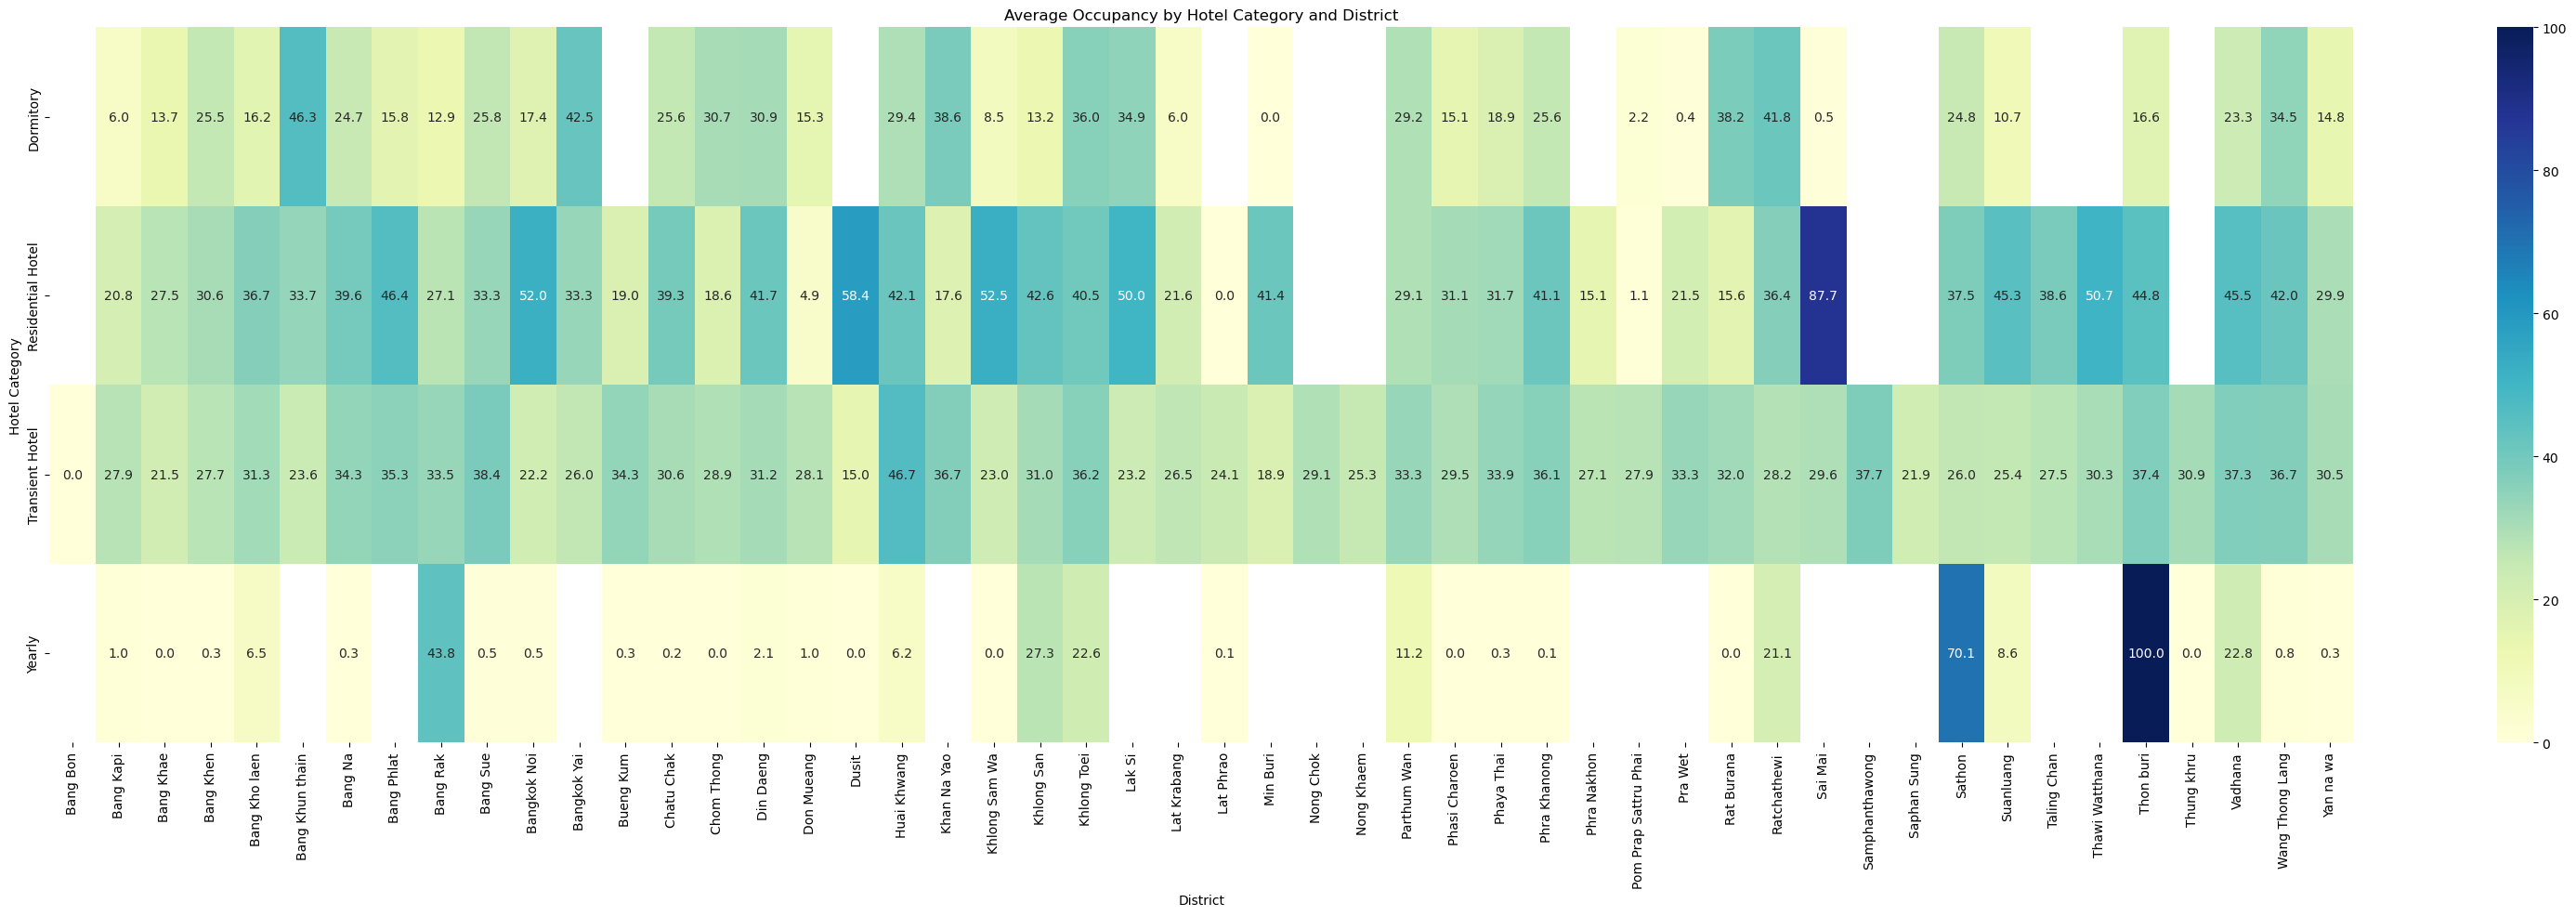

In [209]:
plt.figure(figsize=(40, 10))
sns.heatmap(pivot_per_neighbourhood, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Average Occupancy by Hotel Category and District')
plt.xlabel('District')
plt.ylabel('Hotel Category')
plt.show()

In [210]:
highest_occupancy_per_category = air_bnb.groupby('hotel_category').apply(lambda x: x.loc[x['% Occupancy'].idxmax()])
highest_occupancy_per_category[['name',	'host_name','neighbourhood','room_type','District Category','price category','% Occupancy','hotel_category']]

,name,host_name,neighbourhood,room_type,District Category,price category,% Occupancy,hotel_category
hotel_category,,,,,,,,
Dormitory,Awesome new condo at rama 9 & Asok,Titi,Ratchathewi,Entire home/apt,Commercial & Trade and Service Area,Ultra Cheap,100.0,Dormitory
Residential Hotel,Chic two bedroom for Monthly rental,Phoebe,Bang Rak,Entire home/apt,Commercial & Trade and Service Area,Luxury Class,100.0,Residential Hotel
Transient Hotel,"Beautiful Apt @ Ratchayothin BTS, Free Wifi",Nokina,Chatu Chak,Entire home/apt,Urban Living and New Experience,Budget,100.0,Transient Hotel
Yearly,Long-stay special rate spacious entire floor Siam,Pariya,Parthum Wan,Entire home/apt,Commercial & Trade and Service Area,Luxury Class,100.0,Yearly


Setelah melihat hasil dari Heatmap yang ada diatas dapat diketahui bahwa occupancy tertinggi dimiliki oleh hotel dengan kategori Yearly di district Thon Buri dan hotel dengan kategori Residential di district Sai Mai. Sai Mai adalah district yang masuk ke adalm kategori Urban Living and New Experience, sedangkan jika merujuk pada tabel pivot diatas occupancy tertinggi masih didominasi oleh district yang ada Commercial & Trade and Service Area.

Akan dilakukan analisa untuk mencoba mencari tahu mengapa hal ini bisa terjadi :

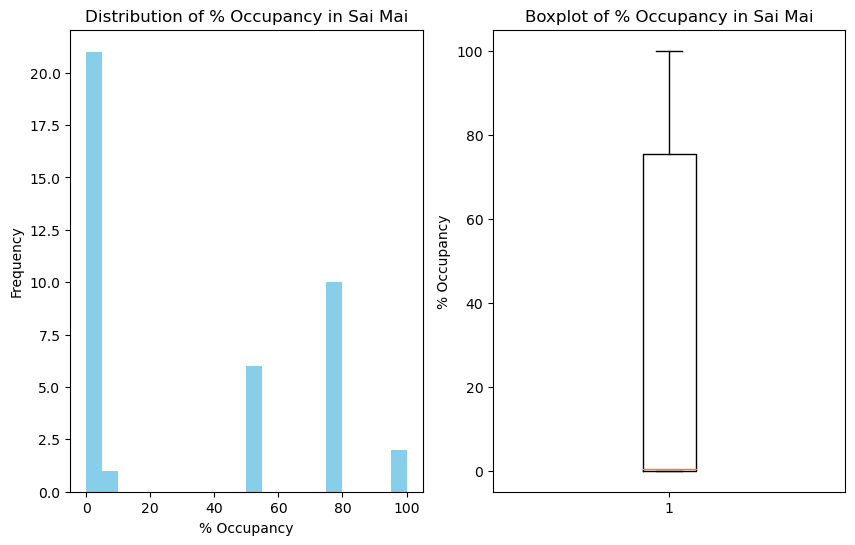

In [211]:
sai_mai_data = air_bnb[air_bnb['neighbourhood'] == 'Sai Mai']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axes[0].hist(sai_mai_data['% Occupancy'], bins=20, color='skyblue')
axes[0].set_xlabel('% Occupancy')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of % Occupancy in Sai Mai')

axes[1].boxplot(sai_mai_data['% Occupancy'])
axes[1].set_ylabel('% Occupancy')
axes[1].set_title('Boxplot of % Occupancy in Sai Mai')
plt.show()

Dari sini kita dapat diketahui bahwa occupancy di Sai Mai tidak terdistribusi dengan baik, sehingga mengakibatkan bias dalam interpretasi data, oleh karena itu data occupancy akan diubah menjadi kategorikal dengan labelling sebagai berikut :

Berdasarkan persebaran data yang ada, maka hoten akan dikelompokan berdasarkan persecentage occupancy yang didapatkan dari distribusi data yang ada :
| Occupancy Category|Occupancy (%) |
|------|-----|
|Peak| >62 |
|Slightly Good| >45 and <=62|
|Moderate| >30  and <=45|
|Low Occupancy| >10 and <=30|
|Very Occupancy| >2 and <=10|
|Low Occupancy| <=2|



In [212]:
air_bnb['% Occupancy'].quantile([0.15,0.3,0.45,0.6,0.75])

0.15     0.000000
0.30     2.191781
0.45     9.863014
0.60    45.424658
0.75    62.191781
Name: % Occupancy, dtype: float64

In [213]:
def occupancy_category(occupancy):    
    if occupancy <= 2.00000:
        return 'Ultra Low Occupancy'
    elif occupancy > 2.00000 and occupancy <= 10.00000:
        return 'Very Low Occupancy'
    elif occupancy > 10.00000 and occupancy <= 30.00000:
        return 'Low Occupancy'
    elif occupancy > 30.00000 and occupancy <= 45.00000:
        return 'Moderate'
    elif occupancy > 45.00000 and occupancy <= 62.00000:
        return 'Slightly Good'
    else:
        return 'Peak'


air_bnb['occupancy category'] = air_bnb['% Occupancy'].apply(occupancy_category)

Setelah `% Occupancy` telah diubah menjadi kategorikal maka akan dilakukan analisa kembali antara `occupancy category` dan `price category` untuk mengetahui kategori harga mana yang memiliki occupancy tertinggi

In [214]:
crosstab_occprice = pd.crosstab(air_bnb['occupancy category'], air_bnb['price category'])
total_per_occcat = crosstab_occprice.sum(axis=1)
crosstab_occprice_percentage = crosstab_occprice.div(total_per_occcat,axis=0)*100
display(crosstab_occprice, crosstab_occprice_percentage)

price category,Budget,Cheap,Economy,First Class,Luxury Class,Ultra Cheap
occupancy category,,,,,,
Low Occupancy,268,388,238,255,375,300
Moderate,62,132,101,65,95,83
Peak,553,636,553,578,1057,605
Slightly Good,334,390,347,411,543,337
Ultra Low Occupancy,585,793,635,646,1283,766
Very Low Occupancy,323,388,379,418,608,314


price category,Budget,Cheap,Economy,First Class,Luxury Class,Ultra Cheap
occupancy category,,,,,,
Low Occupancy,14.692982,21.271930,13.048246,13.980263,20.559211,16.447368
Moderate,11.524164,24.535316,18.773234,12.081784,17.657993,15.427509
Peak,13.887494,15.971873,13.887494,14.515319,26.544450,15.193370
Slightly Good,14.140559,16.511431,14.690940,17.400508,22.988992,14.267570
Ultra Low Occupancy,12.425658,16.843670,13.487681,13.721325,27.251487,16.270178
Very Low Occupancy,13.292181,15.967078,15.596708,17.201646,25.020576,12.921811


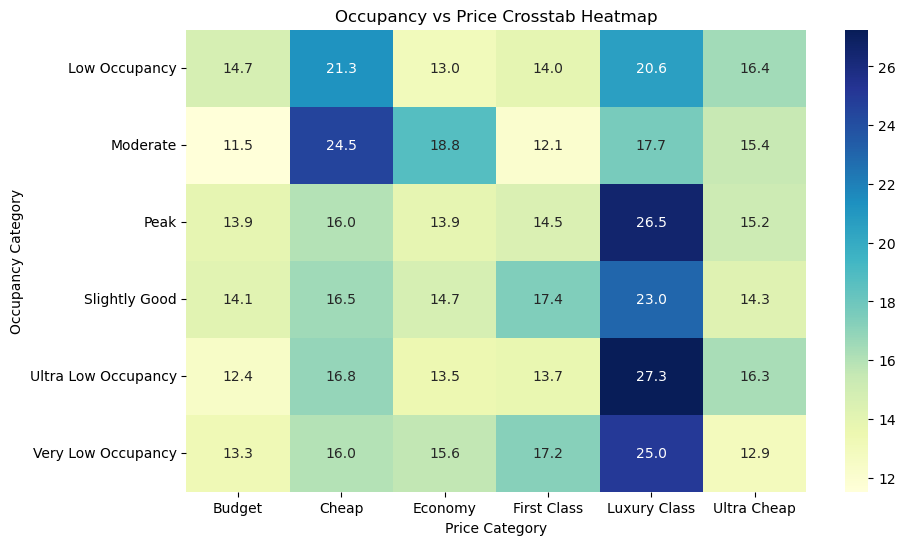

In [215]:
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_occprice_percentage, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Occupancy vs Price Crosstab Heatmap')
plt.xlabel('Price Category')
plt.ylabel('Occupancy Category')
plt.show()

Setelah dipetakan kategori occupancy dengan kategori harga,dapat dilihat bahwa diantara penginapan tersebut terdapat pengipanan yang cukup prospektif dengan cara melakukan filter kolom `occupancy category`. Kolom  `occupancy category` akan difilter hanya pada kategori **Peak**, hal ini didasarkan pada teori terkait [tingkat occupancy yang feasible](https://hoteltechreport.com/news/occupancy-rate) bagi sebuah hotel

In [216]:
filtered_air_bnb = air_bnb.loc[air_bnb['occupancy category'].isin(['Peak', 'Slightly Good'])]
eval_feasible_occ = pd.pivot_table(air_bnb, values= 'id', index=['price category','hotel_category','District Category'], 
                                    columns='occupancy category',
                                    aggfunc = 'count')
eval_feasible_occ = eval_feasible_occ[['Peak']]
eval_feasible_occ

occupancy category                                                     Peak
price category hotel_category    District Category                         
Budget         Dormitory         Commercial & Trade and Service Area    7.0
                                 Temple and Religious                   2.0
                                 Urban Living and New Experience        8.0
               Residential Hotel Commercial & Trade and Service Area   41.0
                                 Temple and Religious                   9.0
...                                                                     ...
Ultra Cheap    Transient Hotel   Temple and Religious                 124.0
                                 Urban Living and New Experience      244.0
               Yearly            Commercial & Trade and Service Area    NaN
                                 Temple and Religious                   NaN
                                 Urban Living and New Experience        NaN

[71 rows x 1 columns]

In [217]:
top_three = eval_feasible_occ['Peak'].nlargest(3)
top_three

price category  hotel_category   District Category                  
Luxury Class    Transient Hotel  Commercial & Trade and Service Area    580.0
First Class     Transient Hotel  Commercial & Trade and Service Area    325.0
Cheap           Transient Hotel  Urban Living and New Experience        249.0
Name: Peak, dtype: float64

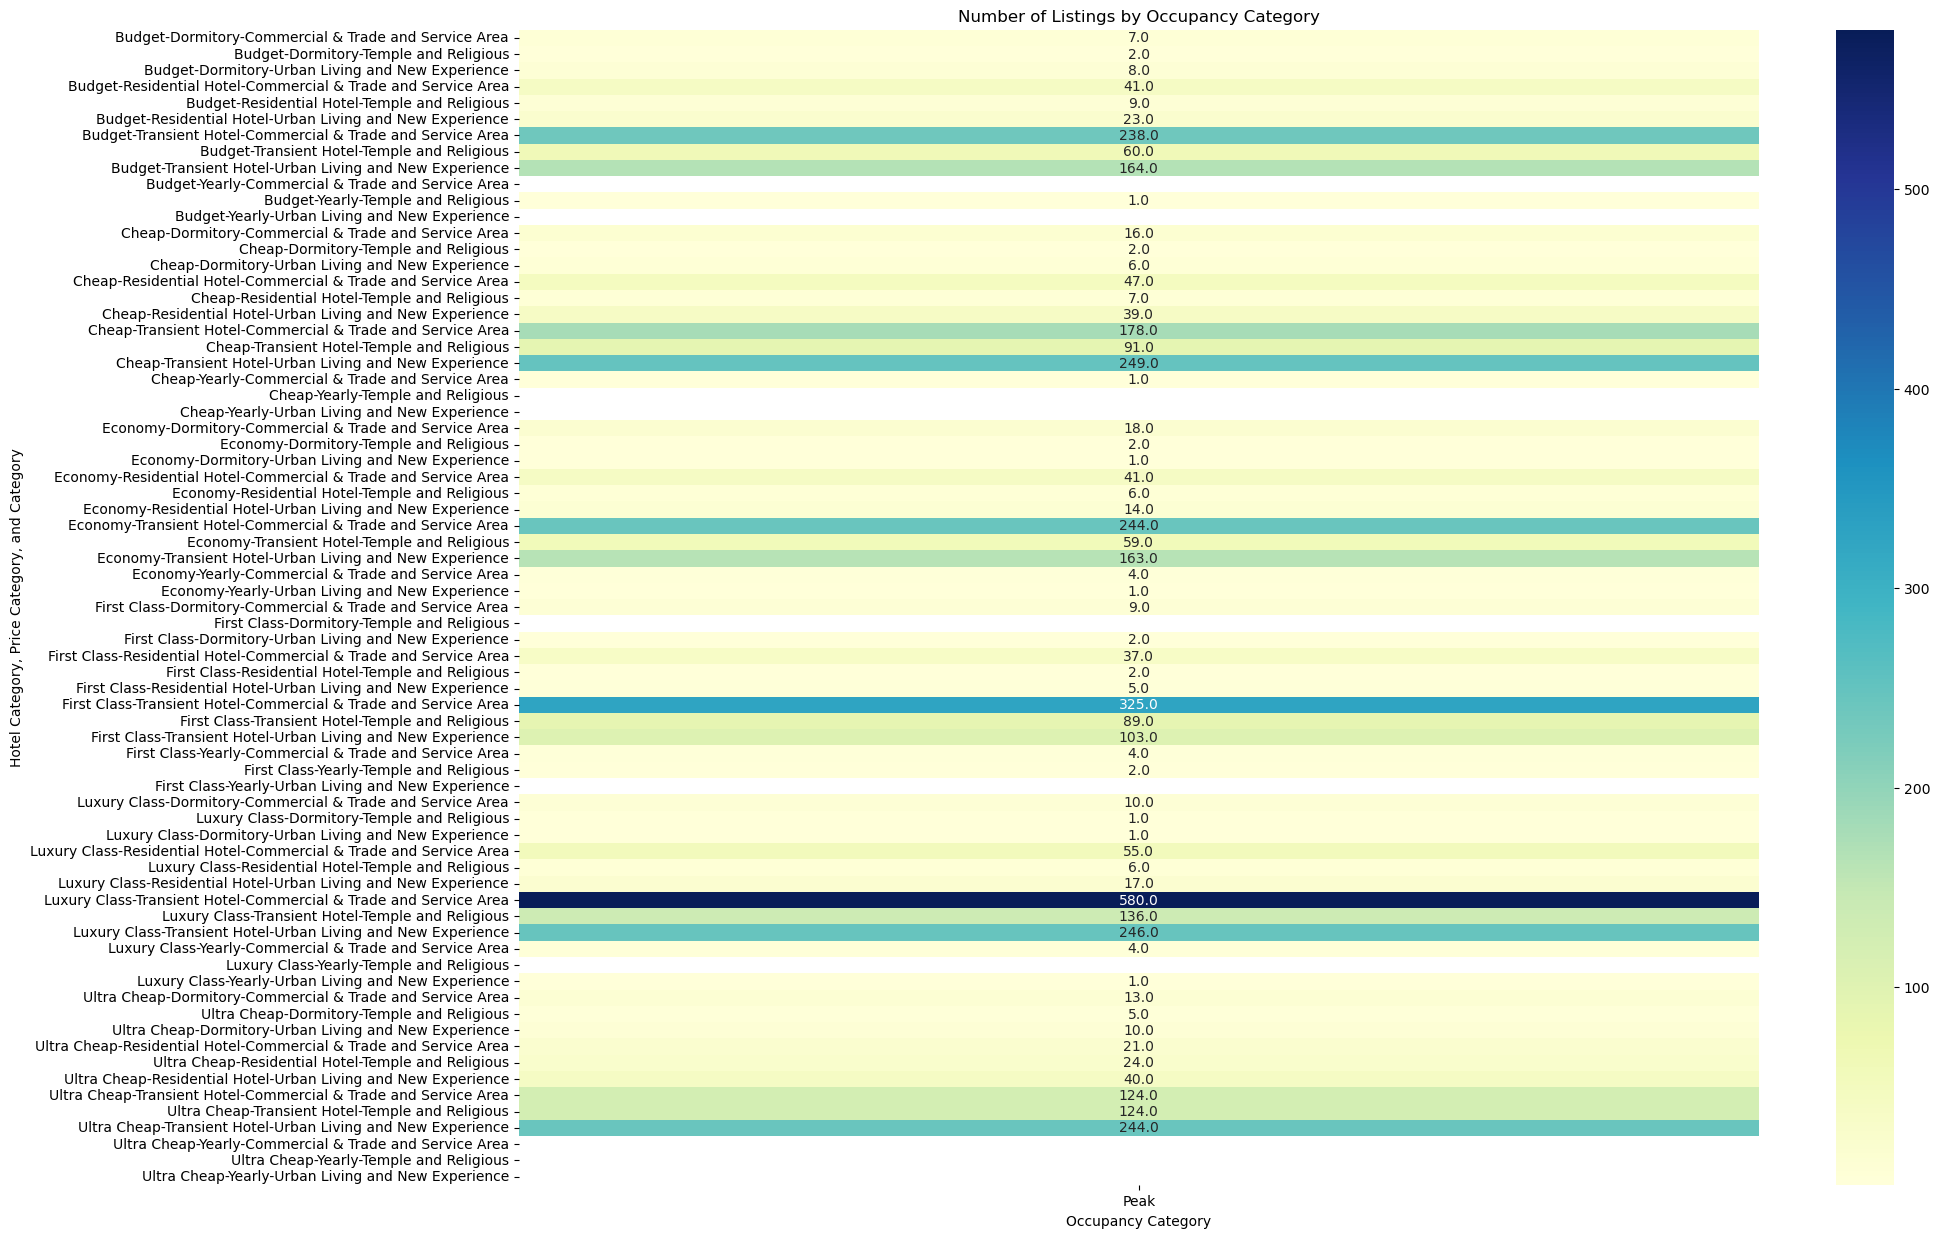

In [218]:
plt.figure(figsize=(20, 15))
sns.heatmap(eval_feasible_occ, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Number of Listings by Occupancy Category')
plt.xlabel('Occupancy Category')
plt.ylabel('Hotel Category, Price Category, and Category')
plt.show()

Kita mengetahui bahwa hotel dengan tipe Transient Hotel di Commercial and Trade & Service Area dengan kategori Luxury Class masih menyisakan ruang untuk dikembangkan lagi.

## **CONCLUSION**
- Tujuan wisata yang paling populer diantara wisatawan di Bangkok adalah wisata belanja dan bisnis di Commercial & Trade and Service Area yang terpusat di district Khlonmg Toei, Vadhana dan Ratchathewi.
- Mayoritas Wisatawan yang mengunjungi Bangkok adalah Luxury Traveler yang memiliki budget untuk penginapan sebesar ฿1.690 - ฿2.430/room/night dengan kecenderungan untuk memimilih penginapan dengan tipe Entire home/apartment.
- Saat ini Bangkok sudah berada dalam fase Oversupply penginapan, dimana rata-rata occupancy penginapan hanya berada di 33,05%, dengan occupancy terendah ada pada penginapan dengan kategori Luxury Class. 
- Ratio penginapan dengan Occupancy tertinggi yang masih layak secara ekonomi juga dimiliki oleh Luxury Class yaitu sebesar 27,3% dari semua jenis penginapan yang memiliki peak occupancy, sehingga masih memungkinkan untuk menaikan room rates. 


## **RECOMENDATION**

- **Tahan Ekspansi pada Daerah yang Memiliki Destinasi Unggulan Berupa Kuil dan Situs Keagamaan:**

Airbnb saat ini menjadi market leader di Bangkok dengan market share sebesar [78,3%](https://www.researchgate.net/publication/365855094_Emergence_of_Peer-to-Peer_Accommodation_Sharing_in_Bangkok_The_Case_of_Airbnb_and_Implications_for_Housing_Market_Distortionb#pf11) sehingga tidak perlu untuk melakukan ekspansi secara agresif terutama pada daerah yang destinasi utamanya adalah Kuil dan Situs Keagamaant. Selain karena jumlah wisatawan yang mengunjungi daerah tersebut cukup sedikit, tingkat occupancy di wilayah tersebut merupakan salah satu yang terendah.

- **Ekspansi Bisnis di Commercial & Trade and Service Area:**

Commercial & Trade and Service Area masih memiliki potensi untuk dikembangkan lagi oleh airbnb, disarankan untuk memperluas jumlah listing melalui district yang persebaran properti nya masih sedikit. Tipe penginapan yang disarankan adalah penginapan dengan tipe entire home/apartment dengan kategory Luxury Class yang memiliki harga diatas ฿2.430/room/night

- **Sediakan Akses atau Jalin Kerjasama dengan Pusat Perbelanjaan:**

Tujuan terbesar wisatawan yang ada di Bangkok adalah wisata belanja dan perjalanan bisnis, sehingga akan lebih menarik jika penginapan memiliki akses yang mudah menuju pusat-pusat perbelanjaan dan bisnis, serta memiliki kerjasama exclusive seperti potongan harga jika berbelanja di pusat perbelanjaan tertentu.

- **Berikan Promo Bundling untuk Wisata Kuil dan Situs Keagamaan:**

Sediakan promo bundling untuk setiap wisatawan yang mengunjungi Commercial & Trade and Service Area untuk merasakan pengalaman berlibur ditempat dengan keunggulan wisata berupa Kuil dan Situs Keagamaan, untuk meningkatkan occupancy district tersebut.



# **Access to Tableu**

You can access the visualization on Tableu via this [link](https://public.tableau.com/app/profile/hans.bonnie/viz/AirbnbAnalysis-HansBonnie/HomeDashboard?publish=yes)